In [1]:
# %pip install pandas==2.2.3 matplotlib==3.9.3 seaborn==0.13.2 tqdm==4.67.1 numpy==2.2.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np

sns.set()
tqdm.pandas()
plt.rcParams['figure.figsize'] = [15, 7]

## 1. Prepare data

In [3]:
calendar_df = pd.read_csv('data/calendar.csv')
calendar_df

date  wm_yr_wk    weekday  wday  month  year       d  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1   
1     2011-01-30     11101     Sunday     2      1  2011     d_2   
2     2011-01-31     11101     Monday     3      1  2011     d_3   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5   
...          ...       ...        ...   ...    ...   ...     ...   
1964  2016-06-15     11620  Wednesday     5      6  2016  d_1965   
1965  2016-06-16     11620   Thursday     6      6  2016  d_1966   
1966  2016-06-17     11620     Friday     7      6  2016  d_1967   
1967  2016-06-18     11621   Saturday     1      6  2016  d_1968   
1968  2016-06-19     11621     Sunday     2      6  2016  d_1969   

      event_name_1 event_type_1  event_name_2 event_type_2  snap_CA  snap_TX  \
0              NaN          NaN           NaN          NaN        0        0   
1              NaN          NaN           NaN          NaN        0        0   
2              NaN          NaN           NaN          NaN        0        0   
3              NaN          NaN           NaN          NaN        1        1   
4              NaN          NaN           NaN          NaN        1        0   
...            ...          ...           ...          ...      ...      ...   
1964           NaN          NaN           NaN          NaN        0        1   
1965           NaN          NaN           NaN          NaN        0        0   
1966           NaN          NaN           NaN          NaN        0        0   
1967           NaN          NaN           NaN          NaN        0        0   
1968  NBAFinalsEnd     Sporting  Father's day     Cultural        0        0   

      snap_WI  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
1964        1  
1965        0  
1966        0  
1967        0  
1968        0  

[1969 rows x 14 columns]

In [4]:
sales_val_df = pd.read_csv('data/sales.csv')
sales_val_df

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  \
0         CA_1       CA    0    0    0    0  ...       1       3       0   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       2   
3         CA_1       CA    0    0    0    0  ...       1       0       5   
4         CA_1       CA    0    0    0    0  ...       2       1       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       2       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       2       1       0   
30488     WI_3       WI    0    0    0    0  ...       0       0       1   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           1       1       1       3       0       1       1  
1           0       0       1       0       0       0       0  
2           1       1       1       0       1       1       1  
3           4       1       0       1       3       7       2  
4           0       1       1       2       2       2       4  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       0       0       1       0       0       1  
30486       0       0       0       0       0       1       0  
30487       2       0       1       0       0       1       0  
30488       0       0       1       0       3       1       3  
30489       0       0       0       0       0       0       0  

[30490 rows x 1919 columns]

In [5]:
sell_prices_df = pd.read_csv('data/sell_prices.csv')
sell_prices_df

store_id        item_id  wm_yr_wk  sell_price
0           CA_1  HOBBIES_1_001     11325        9.58
1           CA_1  HOBBIES_1_001     11326        9.58
2           CA_1  HOBBIES_1_001     11327        8.26
3           CA_1  HOBBIES_1_001     11328        8.26
4           CA_1  HOBBIES_1_001     11329        8.26
...          ...            ...       ...         ...
6841116     WI_3    FOODS_3_827     11617        1.00
6841117     WI_3    FOODS_3_827     11618        1.00
6841118     WI_3    FOODS_3_827     11619        1.00
6841119     WI_3    FOODS_3_827     11620        1.00
6841120     WI_3    FOODS_3_827     11621        1.00

[6841121 rows x 4 columns]

## 2. Missing values & zero values

### 2.1. Missing values

In [6]:
sales_val_df.isna().sum().sum()

np.int64(0)

### 2.2. Zero values all days

In [7]:
def calculate_zero_percent(data):
    count_values = data.value_counts()
    count_zero = count_values[0]
    percent_zero = count_zero / len(data)
    return percent_zero

In [8]:
sales_val_df.iloc[:, 6:]

d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  ...  d_1904  d_1905  \
0        0    0    0    0    0    0    0    0    0     0  ...       1       3   
1        0    0    0    0    0    0    0    0    0     0  ...       0       0   
2        0    0    0    0    0    0    0    0    0     0  ...       2       1   
3        0    0    0    0    0    0    0    0    0     0  ...       1       0   
4        0    0    0    0    0    0    0    0    0     0  ...       2       1   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...     ...   
30485    0    0    2    2    0    3    1    4    1     0  ...       2       0   
30486    0    0    0    0    0    5    0    1    1     3  ...       0       0   
30487    0    6    0    2    2    4    1    8    5     2  ...       2       1   
30488    0    0    0    0    0    0    0    0    0     0  ...       0       0   
30489    0    0    0    0    0    0    0    0    0     0  ...       0       0   

       d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           0       1       1       1       3       0       1       1  
1           0       0       0       1       0       0       0       0  
2           2       1       1       1       0       1       1       1  
3           5       4       1       0       1       3       7       2  
4           1       0       1       1       2       2       2       4  
...       ...     ...     ...     ...     ...     ...     ...     ...  
30485       0       0       0       0       1       0       0       1  
30486       0       0       0       0       0       0       1       0  
30487       0       2       0       1       0       0       1       0  
30488       1       0       0       1       0       3       1       3  
30489       0       0       0       0       0       0       0       0  

[30490 rows x 1913 columns]

In [9]:
sales_val_df['percent_zero'] = sales_val_df.iloc[:, 6:].progress_apply(
    calculate_zero_percent, axis=1
)
sales_val_df

100%|██████████| 30490/30490 [00:02<00:00, 14791.59it/s]


id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1905  d_1906  d_1907  \
0         CA_1       CA    0    0    0    0  ...       3       0       1   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       1       2       1   
3         CA_1       CA    0    0    0    0  ...       0       5       4   
4         CA_1       CA    0    0    0    0  ...       1       1       0   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       0       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       1       0       2   
30488     WI_3       WI    0    0    0    0  ...       0       1       0   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  percent_zero  
0           1       1       3       0       1       1      0.779927  
1           0       1       0       0       0       0      0.789859  
2           1       1       0       1       1       1      0.887088  
3           1       0       1       3       7       2      0.322530  
4           1       1       2       2       2       4      0.496602  
...       ...     ...     ...     ...     ...     ...           ...  
30485       0       0       1       0       0       1      0.726607  
30486       0       0       0       0       1       0      0.749085  
30487       0       1       0       0       1       0      0.538421  
30488       0       1       0       3       1       3      0.813905  
30489       0       0       0       0       0       0      0.740199  

[30490 rows x 1920 columns]

<Axes: >

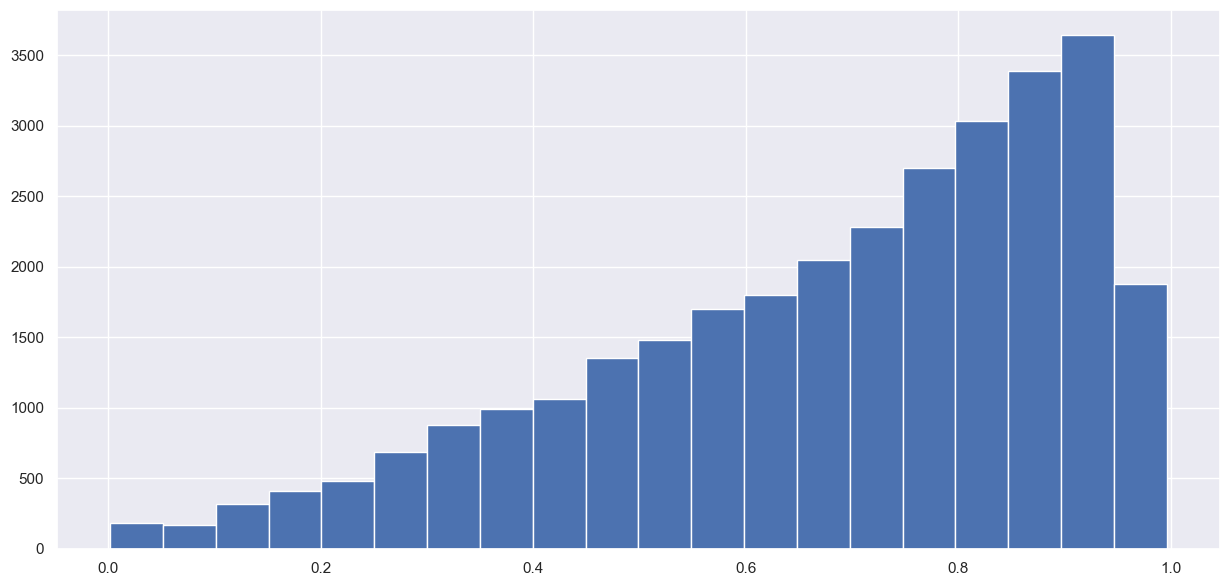

In [10]:
sales_val_df.percent_zero.hist(bins=20)

### 2.3. Zero values after open day

In [11]:
def calculate_zero_percent_after_open_day(data):
    drop_index_list = []
    for index, value in data.items():
        if value != 0:
            break
        drop_index_list.append(index)
    data = data.drop(drop_index_list)

    count_values = data.value_counts()
    count_zero = count_values[0]
    percent_zero = count_zero / len(data)
    return percent_zero

In [12]:
sales_val_df.iloc[:, 6:-1]

d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  ...  d_1904  d_1905  \
0        0    0    0    0    0    0    0    0    0     0  ...       1       3   
1        0    0    0    0    0    0    0    0    0     0  ...       0       0   
2        0    0    0    0    0    0    0    0    0     0  ...       2       1   
3        0    0    0    0    0    0    0    0    0     0  ...       1       0   
4        0    0    0    0    0    0    0    0    0     0  ...       2       1   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...     ...   
30485    0    0    2    2    0    3    1    4    1     0  ...       2       0   
30486    0    0    0    0    0    5    0    1    1     3  ...       0       0   
30487    0    6    0    2    2    4    1    8    5     2  ...       2       1   
30488    0    0    0    0    0    0    0    0    0     0  ...       0       0   
30489    0    0    0    0    0    0    0    0    0     0  ...       0       0   

       d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           0       1       1       1       3       0       1       1  
1           0       0       0       1       0       0       0       0  
2           2       1       1       1       0       1       1       1  
3           5       4       1       0       1       3       7       2  
4           1       0       1       1       2       2       2       4  
...       ...     ...     ...     ...     ...     ...     ...     ...  
30485       0       0       0       0       1       0       0       1  
30486       0       0       0       0       0       0       1       0  
30487       0       2       0       1       0       0       1       0  
30488       1       0       0       1       0       3       1       3  
30489       0       0       0       0       0       0       0       0  

[30490 rows x 1913 columns]

In [13]:
sales_val_df['percent_zero_open_day'] = sales_val_df.iloc[:, 6:-1].progress_apply(
    calculate_zero_percent_after_open_day, axis=1
)
sales_val_df

100%|██████████| 30490/30490 [00:06<00:00, 4984.36it/s]


id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1906  d_1907  d_1908  \
0         CA_1       CA    0    0    0    0  ...       0       1       1   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       1   
3         CA_1       CA    0    0    0    0  ...       5       4       1   
4         CA_1       CA    0    0    0    0  ...       1       0       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       0       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       0       2       0   
30488     WI_3       WI    0    0    0    0  ...       1       0       0   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1909  d_1910  d_1911  d_1912  d_1913  percent_zero  \
0           1       3       0       1       1      0.779927   
1           1       0       0       0       0      0.789859   
2           1       0       1       1       1      0.887088   
3           0       1       3       7       2      0.322530   
4           1       2       2       2       4      0.496602   
...       ...     ...     ...     ...     ...           ...   
30485       0       1       0       0       1      0.726607   
30486       0       0       0       1       0      0.749085   
30487       1       0       0       1       0      0.538421   
30488       1       0       3       1       3      0.813905   
30489       0       0       0       0       0      0.740199   

       percent_zero_open_day  
0                   0.583992  
1                   0.772881  
2                   0.732673  
3                   0.309536  
4                   0.465297  
...                      ...  
30485               0.726321  
30486               0.748428  
30487               0.538180  
30488               0.634497  
30489               0.365262  

[30490 rows x 1921 columns]

<Axes: >

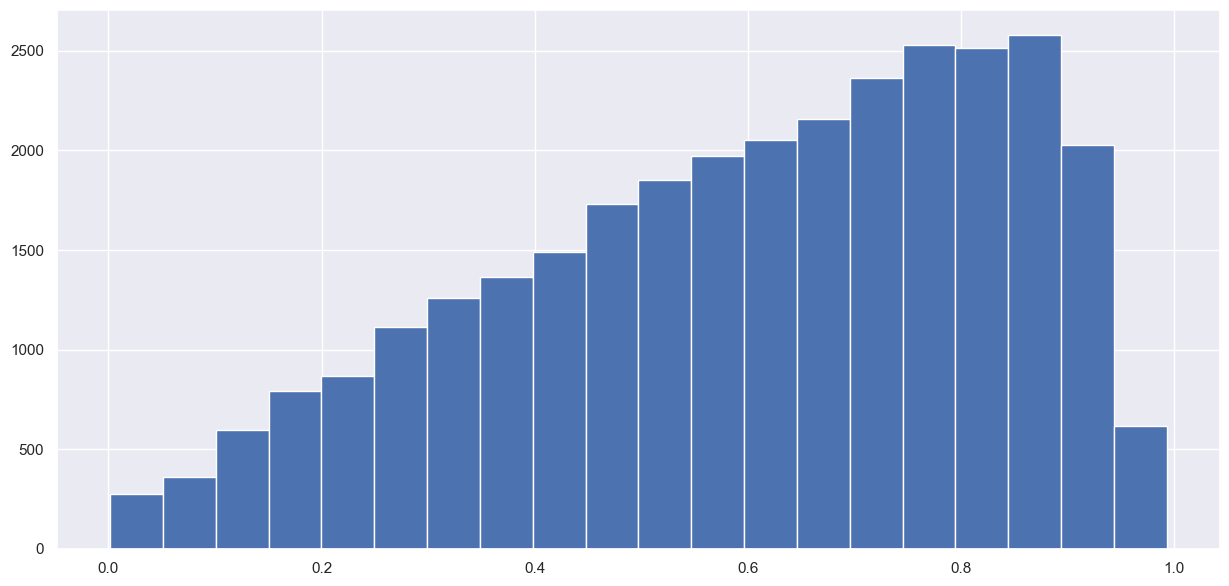

In [14]:
sales_val_df.percent_zero_open_day.hist(bins=20)

## 3. The sales time series

### 3.1. Sales on all products

In [15]:
agg_sales = sales_val_df.iloc[:, 6:-2].sum()
agg_sales

d_1       32631
d_2       31749
d_3       23783
d_4       25412
d_5       19146
          ...  
d_1909    35343
d_1910    35033
d_1911    40517
d_1912    48962
d_1913    49795
Length: 1913, dtype: int64

<Axes: >

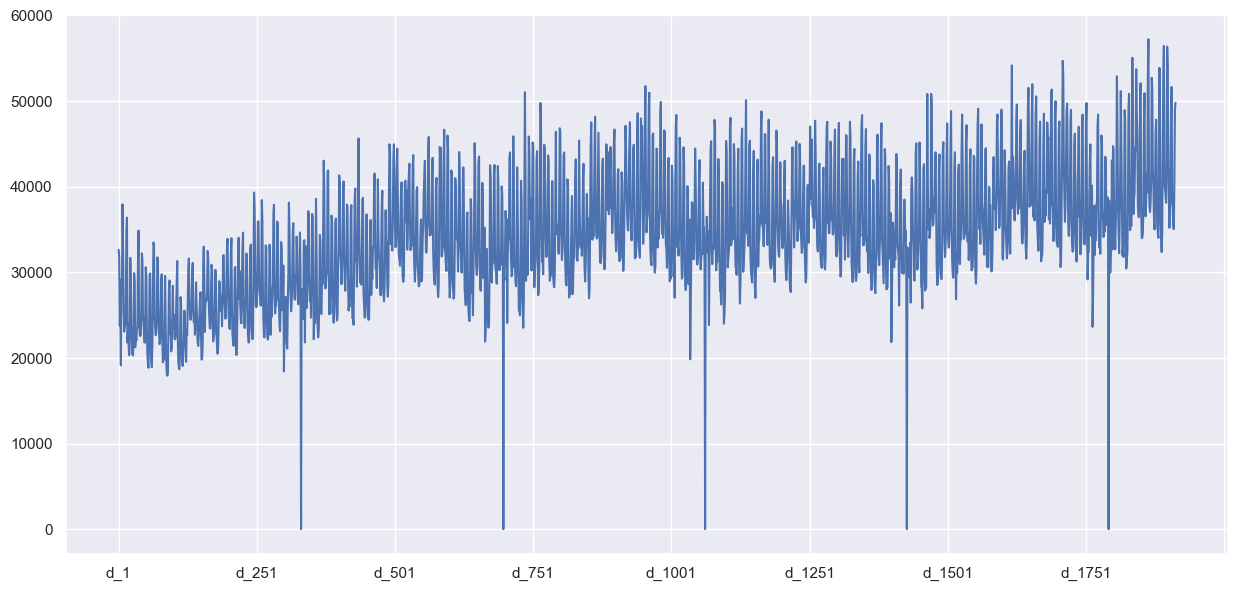

In [16]:
agg_sales.plot()

In [17]:
avg_sales = agg_sales / len(sales_val_df)
avg_sales

d_1       1.070220
d_2       1.041292
d_3       0.780026
d_4       0.833454
d_5       0.627944
            ...   
d_1909    1.159167
d_1910    1.149000
d_1911    1.328862
d_1912    1.605838
d_1913    1.633158
Length: 1913, dtype: float64

<Axes: >

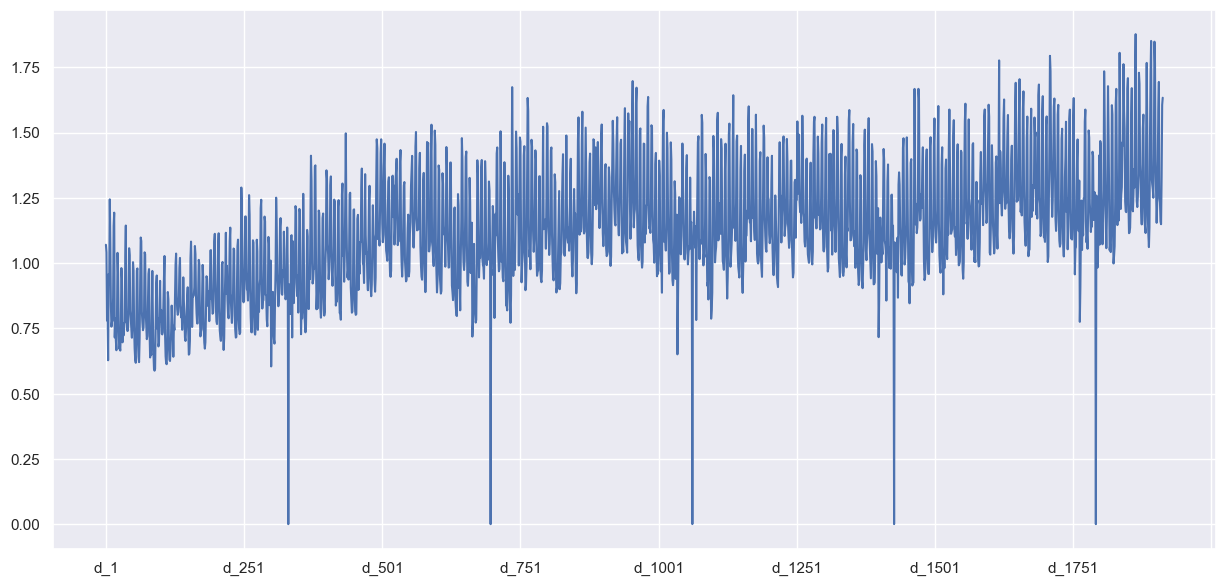

In [18]:
avg_sales.plot()

### 3.2. Sales on an individual product

In [19]:
_random_id = sales_val_df.id.sample(1).values[0]

# _random_id = 'HOBBIES_2_060_WI_1_validation'
_random_id

'FOODS_3_612_TX_1_validation'

<Axes: >

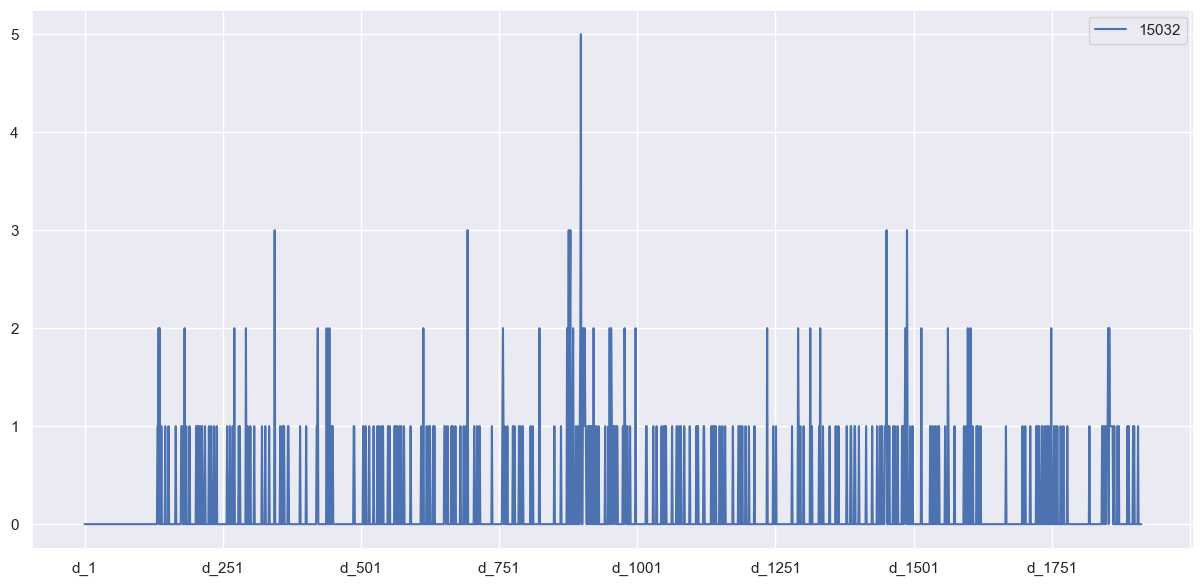

In [20]:
sales_val_df[sales_val_df.id == _random_id].iloc[:, 6:-2].T.plot()

### 3.3. Sales per state

In [21]:
agg_dict = {k: sum for k in sales_val_df.iloc[:, 6:-2].columns}

In [22]:
group_by_state_df = sales_val_df.groupby('state_id').agg(agg_dict)
group_by_state_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1484447069.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group_by_state_df = sales_val_df.groupby('state_id').agg(agg_dict)
/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1484447069.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group_by_state_df = sales_val_df.groupby('state_id').agg(agg_dict)


d_1    d_2    d_3    d_4   d_5    d_6    d_7    d_8    d_9   d_10  \
state_id                                                                        
CA        14195  13805  10108  11047  9925  11322  12251  16610  14696  11822   
TX         9438   9630   6778   7381  5912   9006   6226   9440   9376   7319   
WI         8998   8314   6897   6984  3309   8883   9533  11882   8664   6431   

          ...  d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  \
state_id  ...                                                                   
CA        ...   16255   20564   23032   17052   15784   15148   14488   17095   
TX        ...   10800   12460   13709    9868   10922    9600    9602   10615   
WI        ...   14734   15338   14899   11139   10864   10595   10943   12807   

          d_1912  d_1913  
state_id                  
CA         21834   23187  
TX         12266   12282  
WI         14862   14326  

[3 rows x 1913 columns]

<Axes: >

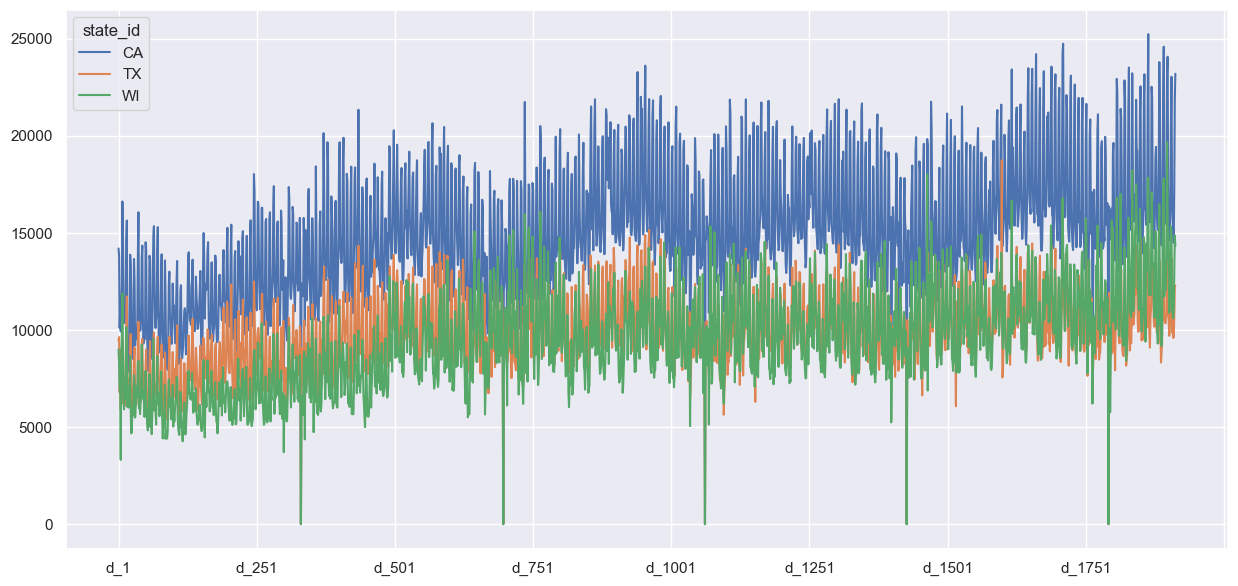

In [23]:
group_by_state_df.T.plot()

In [24]:
def group_by_month(_df, _agg_dict):
    merged_calendar_df = _df.T.reset_index().rename(columns={'index':'d'}).merge(calendar_df, how='inner', on='d')
    monthly_df = merged_calendar_df.groupby(['year', 'month']).agg(_agg_dict).reset_index()
    monthly_df = monthly_df.drop(columns=['year', 'month'])
    monthly_df = monthly_df.drop(index=[0, len(monthly_df) - 1])
    return monthly_df

In [25]:
monthly_df = group_by_month(
    group_by_state_df,
    {'CA': sum, 'TX': sum, 'WI': sum}
)
monthly_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1682650318.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  monthly_df = merged_calendar_df.groupby(['year', 'month']).agg(_agg_dict).reset_index()


CA      TX      WI
1   318101  212015  196259
2   339678  225162  198727
3   331004  220681  186028
4   321566  221620  176376
5   332948  235653  184779
..     ...     ...     ...
58  482047  303714  328215
59  479557  305981  340698
60  525392  321790  368104
61  505704  328110  379113
62  538930  343674  393142

[62 rows x 3 columns]

<Axes: >

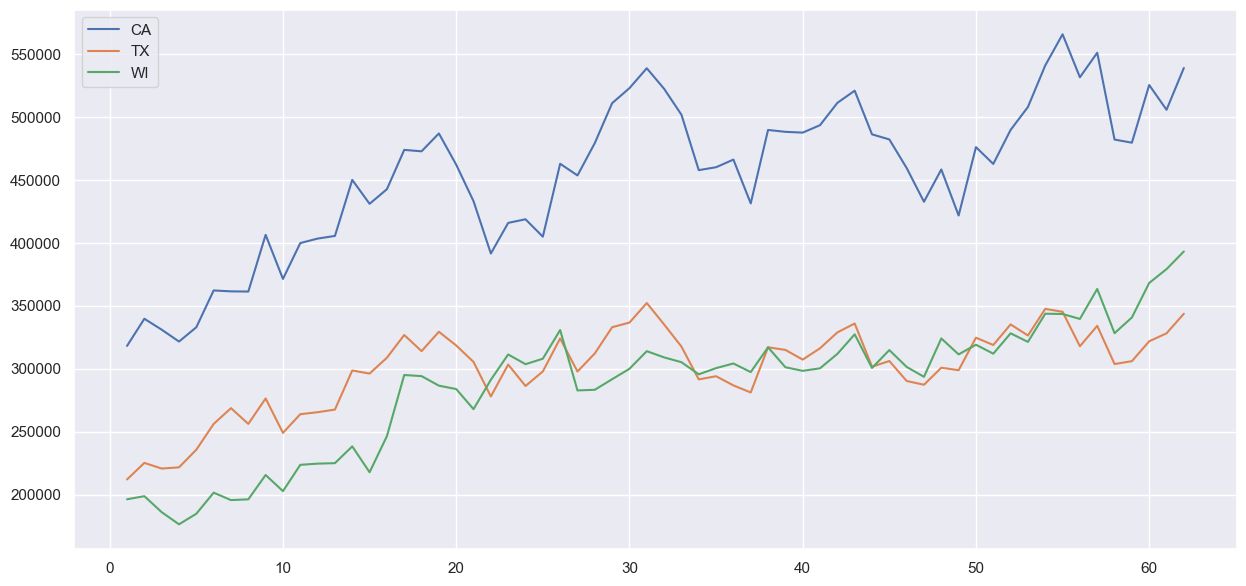

In [26]:
monthly_df.plot()

### 3.4. Sales per category

In [27]:
sales_val_df

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1906  d_1907  d_1908  \
0         CA_1       CA    0    0    0    0  ...       0       1       1   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       1   
3         CA_1       CA    0    0    0    0  ...       5       4       1   
4         CA_1       CA    0    0    0    0  ...       1       0       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       0       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       0       2       0   
30488     WI_3       WI    0    0    0    0  ...       1       0       0   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1909  d_1910  d_1911  d_1912  d_1913  percent_zero  \
0           1       3       0       1       1      0.779927   
1           1       0       0       0       0      0.789859   
2           1       0       1       1       1      0.887088   
3           0       1       3       7       2      0.322530   
4           1       2       2       2       4      0.496602   
...       ...     ...     ...     ...     ...           ...   
30485       0       1       0       0       1      0.726607   
30486       0       0       0       1       0      0.749085   
30487       1       0       0       1       0      0.538421   
30488       1       0       3       1       3      0.813905   
30489       0       0       0       0       0      0.740199   

       percent_zero_open_day  
0                   0.583992  
1                   0.772881  
2                   0.732673  
3                   0.309536  
4                   0.465297  
...                      ...  
30485               0.726321  
30486               0.748428  
30487               0.538180  
30488               0.634497  
30489               0.365262  

[30490 rows x 1921 columns]

In [28]:
group_by_category_df = sales_val_df.groupby('cat_id').agg(agg_dict)
group_by_category_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/2473222449.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group_by_category_df = sales_val_df.groupby('cat_id').agg(agg_dict)
/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/2473222449.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group_by_category_df = sales_val_df.groupby('cat_id').agg(agg_dict)


d_1    d_2    d_3    d_4    d_5    d_6    d_7    d_8    d_9  \
cat_id                                                                     
FOODS      23178  22758  17174  18878  14603  22093  20490  27751  24862   
HOBBIES     3764   3357   2682   2669   1814   3220   2944   3986   2899   
HOUSEHOLD   5689   5634   3927   3865   2729   3898   4576   6195   4975   

            d_10  ...  d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  \
cat_id            ...                                                           
FOODS      18901  ...   28682   32007   34497   26151   24948   23632   23317   
HOBBIES     2615  ...    3786    4634    4820    3323    3787    3472    3353   
HOUSEHOLD   4056  ...    9321   11721   12323    8585    8835    8239    8363   

           d_1911  d_1912  d_1913  
cat_id                             
FOODS       26704   31927   32654  
HOBBIES      4085    4787    4683  
HOUSEHOLD    9728   12248   12458  

[3 rows x 1913 columns]

<Axes: >

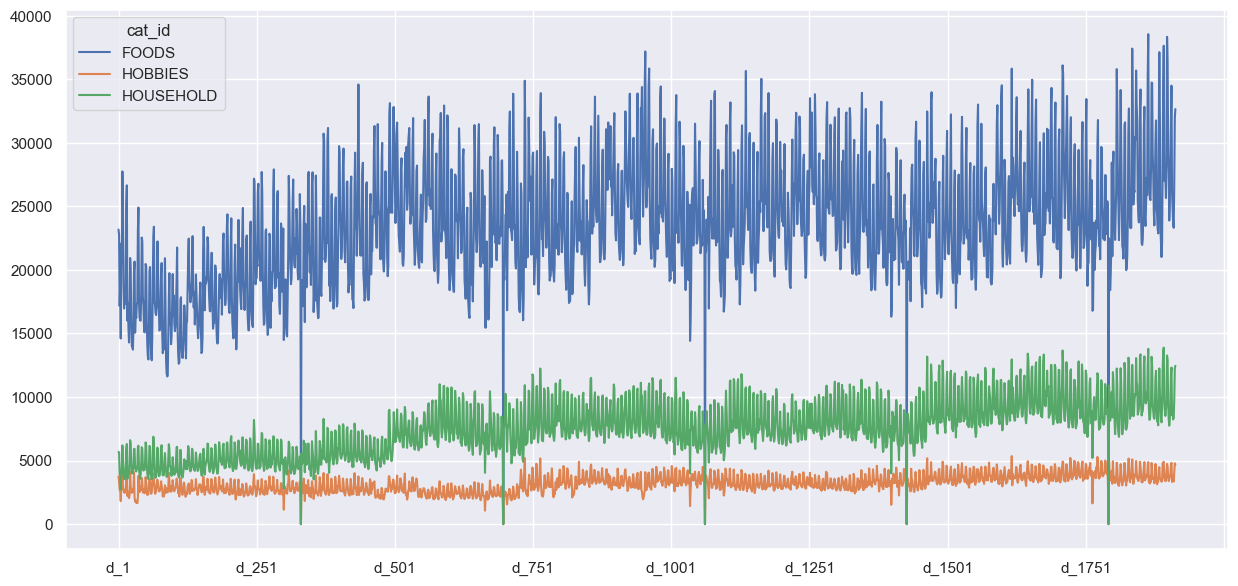

In [29]:
group_by_category_df.T.plot()

In [30]:
monthly_df = group_by_month(
    group_by_category_df,
    {'FOODS': sum, 'HOBBIES': sum, 'HOUSEHOLD': sum}
)
monthly_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1682650318.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  monthly_df = merged_calendar_df.groupby(['year', 'month']).agg(_agg_dict).reset_index()


FOODS  HOBBIES  HOUSEHOLD
1   520250    77362     128763
2   534914    83691     144962
3   509568    86199     141946
4   491753    87413     140396
5   525861    84520     142999
..     ...      ...        ...
58  719316   119644     275016
59  725042   124529     276665
60  807440   117553     290293
61  804739   112939     295249
62  855454   116241     304051

[62 rows x 3 columns]

<Axes: >

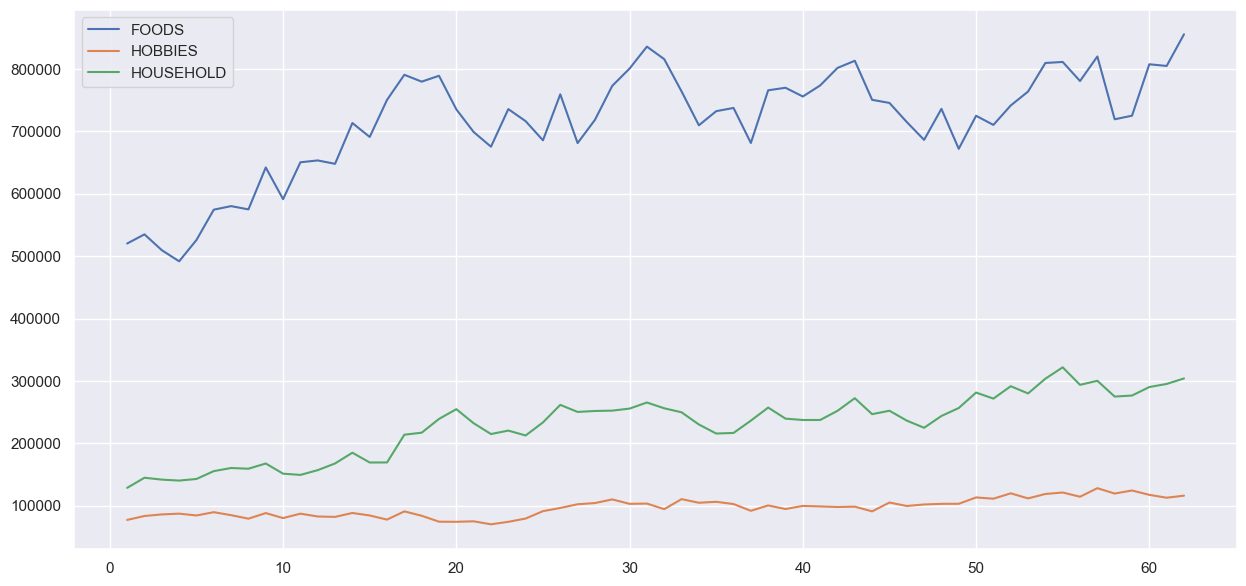

In [31]:
monthly_df.plot()

<Axes: >

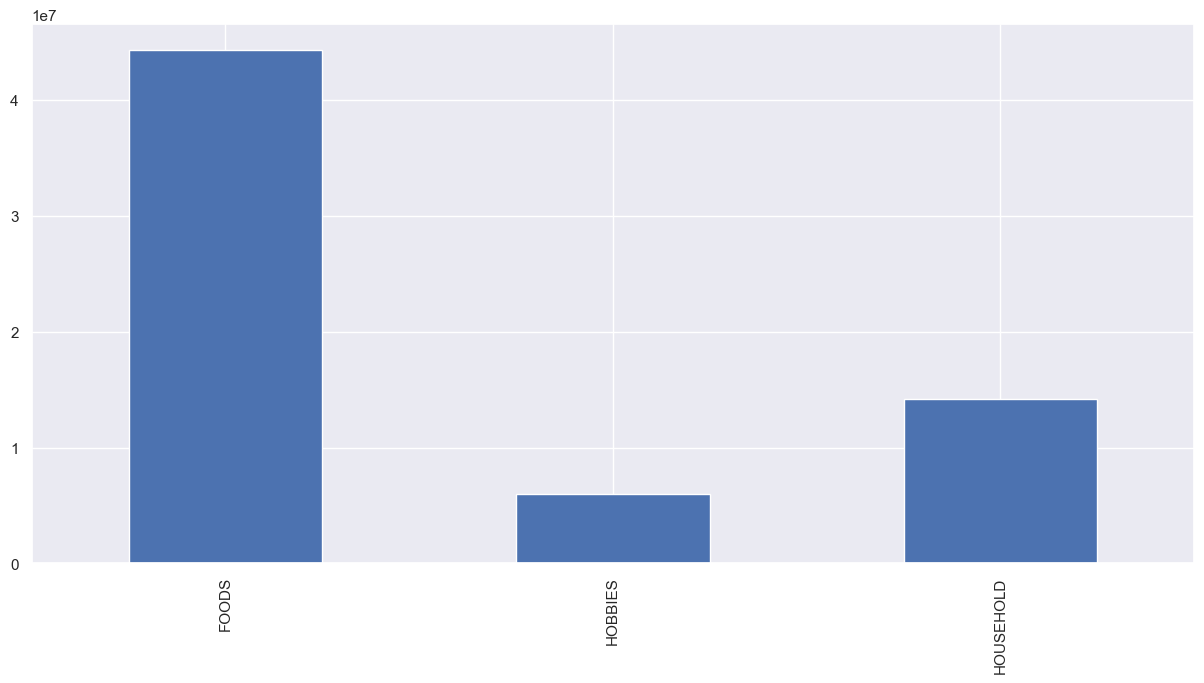

In [32]:
monthly_df.sum().plot(kind='bar')

### 3.5. Sales per store

In [33]:
sales_val_df

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1906  d_1907  d_1908  \
0         CA_1       CA    0    0    0    0  ...       0       1       1   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       1   
3         CA_1       CA    0    0    0    0  ...       5       4       1   
4         CA_1       CA    0    0    0    0  ...       1       0       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       0       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       0       2       0   
30488     WI_3       WI    0    0    0    0  ...       1       0       0   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1909  d_1910  d_1911  d_1912  d_1913  percent_zero  \
0           1       3       0       1       1      0.779927   
1           1       0       0       0       0      0.789859   
2           1       0       1       1       1      0.887088   
3           0       1       3       7       2      0.322530   
4           1       2       2       2       4      0.496602   
...       ...     ...     ...     ...     ...           ...   
30485       0       1       0       0       1      0.726607   
30486       0       0       0       1       0      0.749085   
30487       1       0       0       1       0      0.538421   
30488       1       0       3       1       3      0.813905   
30489       0       0       0       0       0      0.740199   

       percent_zero_open_day  
0                   0.583992  
1                   0.772881  
2                   0.732673  
3                   0.309536  
4                   0.465297  
...                      ...  
30485               0.726321  
30486               0.748428  
30487               0.538180  
30488               0.634497  
30489               0.365262  

[30490 rows x 1921 columns]

In [34]:
group_by_store_df = sales_val_df.groupby('store_id').agg(agg_dict)
group_by_store_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/190759838.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group_by_store_df = sales_val_df.groupby('store_id').agg(agg_dict)
/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/190759838.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group_by_store_df = sales_val_df.groupby('store_id').agg(agg_dict)


d_1   d_2   d_3   d_4   d_5   d_6   d_7   d_8   d_9  d_10  ...  \
store_id                                                              ...   
CA_1      4337  4155  2816  3051  2630  3276  3450  5437  4340  3157  ...   
CA_2      3494  3046  2121  2324  1942  2288  2629  3729  2957  2218  ...   
CA_3      4739  4827  3785  4232  3817  4369  4703  5456  5581  4912  ...   
CA_4      1625  1777  1386  1440  1536  1389  1469  1988  1818  1535  ...   
TX_1      2556  2687  1822  2258  1694  2734  1691  2820  2887  2174  ...   
TX_2      3852  3937  2731  2954  2492  3439  2588  3772  3657  2932  ...   
TX_3      3030  3006  2225  2169  1726  2833  1947  2848  2832  2213  ...   
WI_1      2704  2194  1562  1251     2  2049  2815  3248  1674  1355  ...   
WI_2      2256  1922  2018  2522  1175  2244  2232  2643  2140  1836  ...   
WI_3      4038  4198  3317  3211  2132  4590  4486  5991  4850  3240  ...   

          d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  \
store_id                                                                   
CA_1        3982    5437    5954    4345    3793    3722    3709    4387   
CA_2        4440    5352    5760    3830    3631    3691    3303    4457   
CA_3        5337    6936    8271    6068    5683    5235    5018    5623   
CA_4        2496    2839    3047    2809    2677    2500    2458    2628   
TX_1        3084    3724    4192    3410    3257    2901    2776    3022   
TX_2        3897    4475    4998    3311    3727    3384    3446    3902   
TX_3        3819    4261    4519    3147    3938    3315    3380    3691   
WI_1        3862    4862    4812    3236    3069    3242    3324    3991   
WI_2        6259    5579    5566    4347    4464    4194    4393    4988   
WI_3        4613    4897    4521    3556    3331    3159    3226    3828   

          d_1912  d_1913  
store_id                  
CA_1        5577    6113  
CA_2        5884    6082  
CA_3        7419    7721  
CA_4        2954    3271  
TX_1        3700    4033  
TX_2        4483    4292  
TX_3        4083    3957  
WI_1        4772    4874  
WI_2        5404    5127  
WI_3        4686    4325  

[10 rows x 1913 columns]

In [35]:
store_agg_dict = {store: sum for store in sales_val_df.store_id.unique()}
store_agg_dict

{'CA_1': <function sum(iterable, /, start=0)>,
 'CA_2': <function sum(iterable, /, start=0)>,
 'CA_3': <function sum(iterable, /, start=0)>,
 'CA_4': <function sum(iterable, /, start=0)>,
 'TX_1': <function sum(iterable, /, start=0)>,
 'TX_2': <function sum(iterable, /, start=0)>,
 'TX_3': <function sum(iterable, /, start=0)>,
 'WI_1': <function sum(iterable, /, start=0)>,
 'WI_2': <function sum(iterable, /, start=0)>,
 'WI_3': <function sum(iterable, /, start=0)>}

In [36]:
monthly_df = group_by_month(
    group_by_store_df,
    store_agg_dict
)
monthly_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1682650318.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  monthly_df = merged_calendar_df.groupby(['year', 'month']).agg(_agg_dict).reset_index()


CA_1    CA_2    CA_3   CA_4    TX_1    TX_2    TX_3    WI_1    WI_2  \
1    89434   67686  119792  41189   62534   84900   64581   46592   51708   
2    93468   73964  127344  44902   66890   89902   68370   49747   51113   
3    91553   72803  122428  44220   66435   87683   66563   46898   47651   
4    87988   68305  120711  44562   67920   86128   67572   45269   45487   
5    90376   69380  129867  43325   69945   89914   75794   46776   50737   
..     ...     ...     ...    ...     ...     ...     ...     ...     ...   
58  123590  117037  170986  70434   88531  109508  105675  102489  120937   
59  123656  120398  167423  68080   89279  111871  104831  110443  126354   
60  131598  128709  189217  75868   93112  116650  112028  113934  140948   
61  126655  121210  185822  72017   93504  121410  113196  109622  154084   
62  136557  126302  196350  79721  100805  125617  117252  114348  159236   

      WI_3  
1    97959  
2    97867  
3    91479  
4    85620  
5    87266  
..     ...  
58  104789  
59  103901  
60  113222  
61  115407  
62  119558  

[62 rows x 10 columns]

<Axes: >

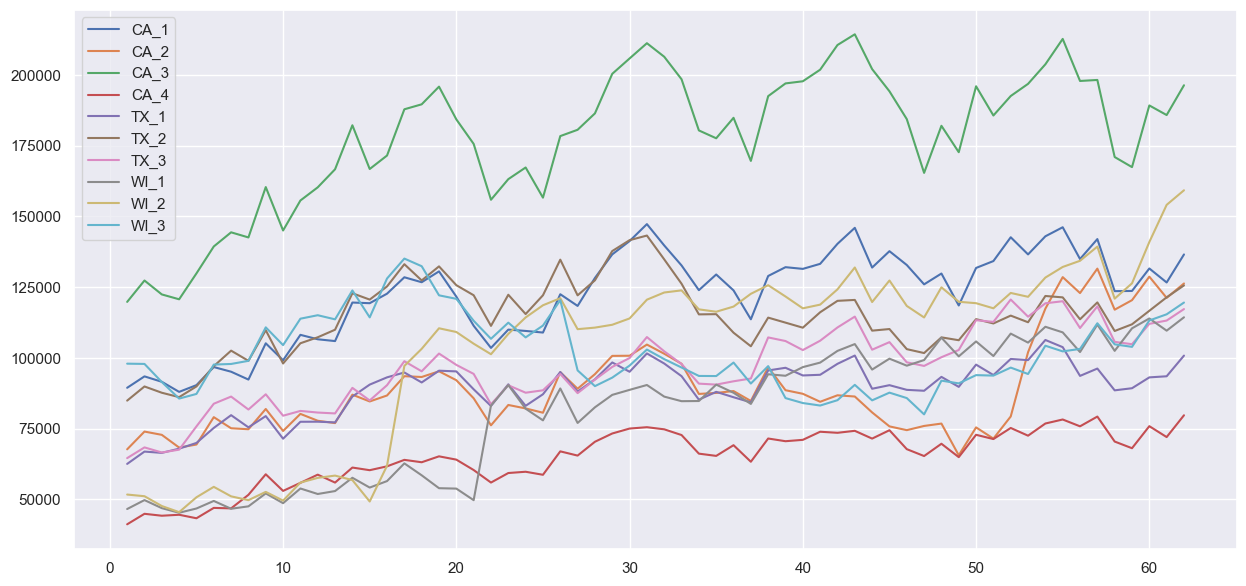

In [37]:
monthly_df.plot()

<Axes: >

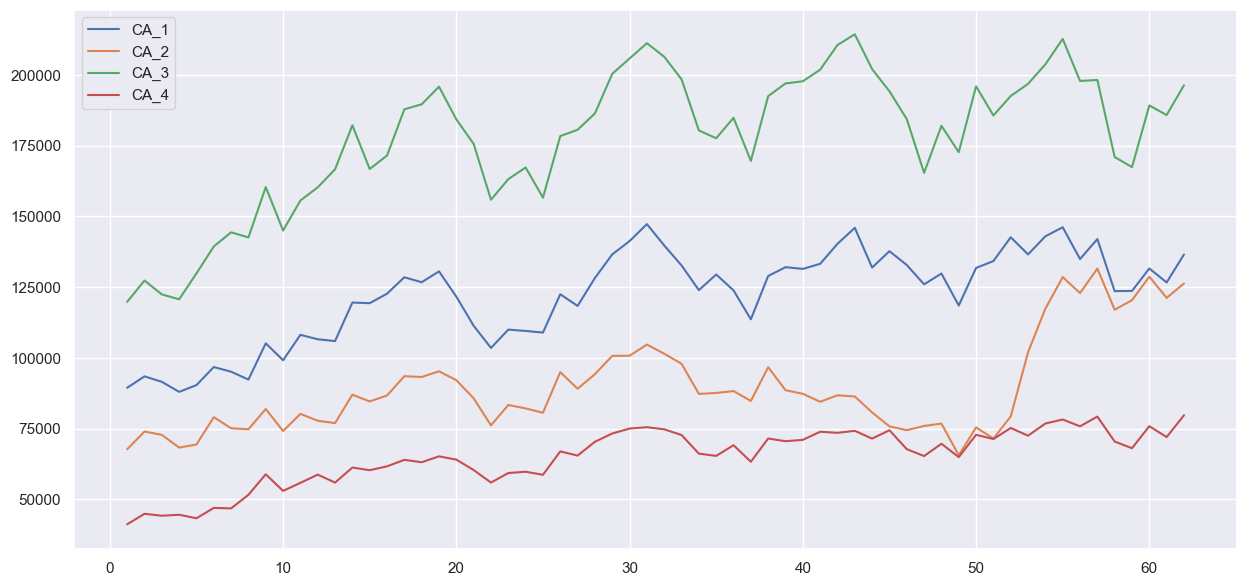

In [38]:
monthly_df.iloc[:, :4].plot()

<Axes: >

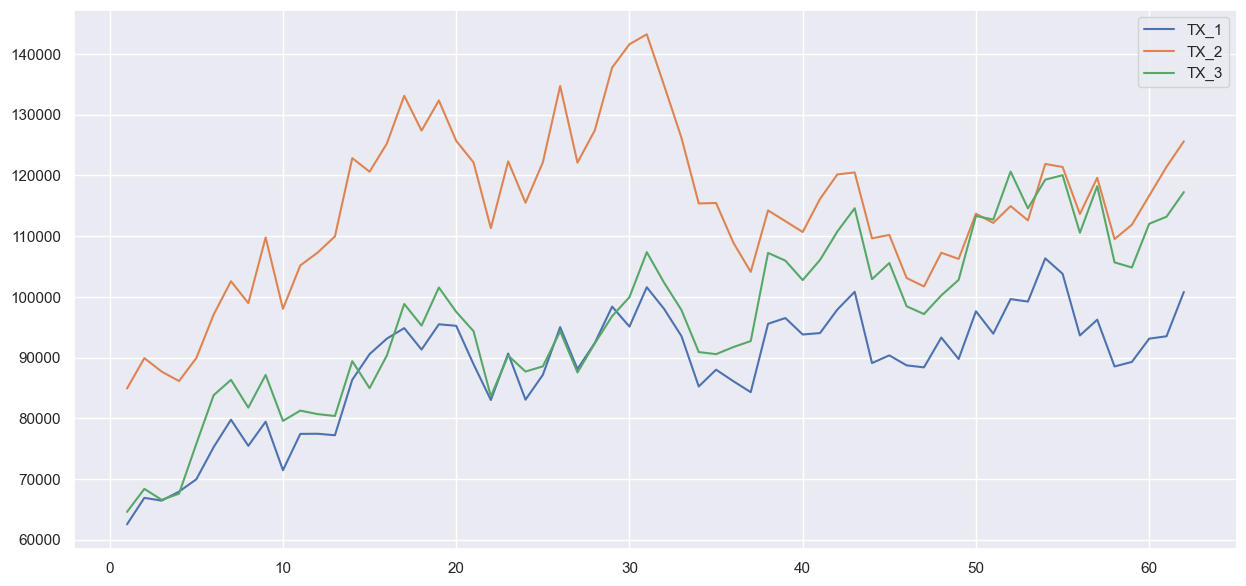

In [39]:
monthly_df.iloc[:, 4:7].plot()

<Axes: >

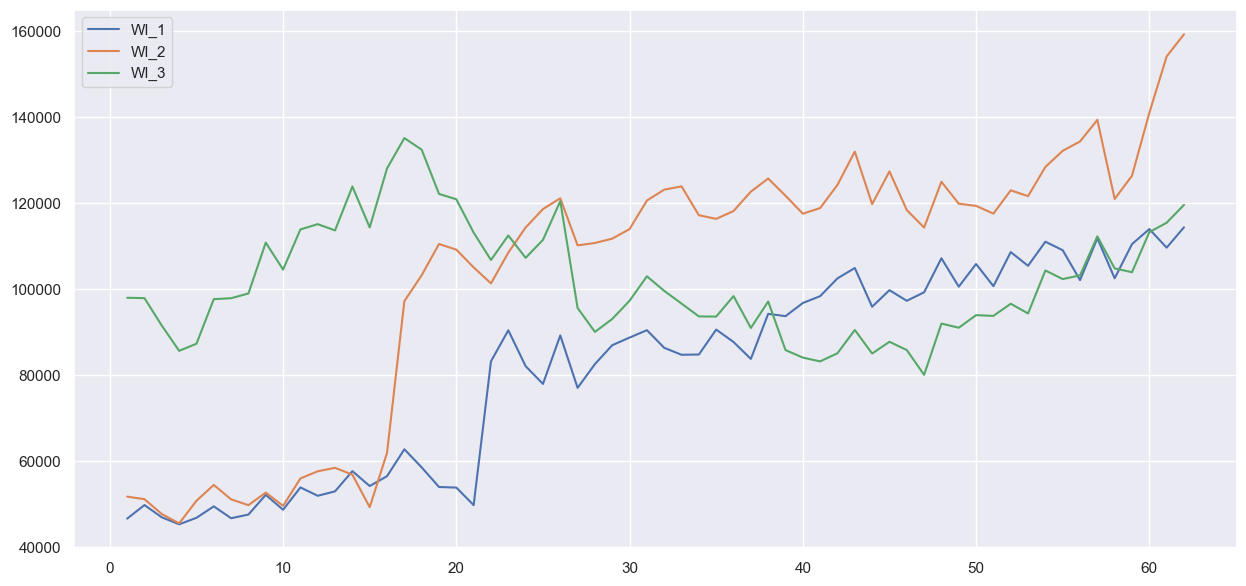

In [40]:
monthly_df.iloc[:, 7:].plot()

### 3.6. Sales per department

In [41]:
group_by_state_dept_df = sales_val_df.groupby(['state_id', 'dept_id']).agg(agg_dict).reset_index(level=1)
group_by_state_dept_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/3682967335.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group_by_state_dept_df = sales_val_df.groupby(['state_id', 'dept_id']).agg(agg_dict).reset_index(level=1)
/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/3682967335.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group_by_state_dept_df = sales_val_df.groupby(['state_id', 'dept_id']).agg(agg_dict).reset_index(level=1)


dept_id   d_1   d_2   d_3   d_4   d_5   d_6   d_7   d_8   d_9  \
state_id                                                                      
CA            FOODS_1  1157  1142   787   743   729   796   913  1036  1049   
CA            FOODS_2  1864  1987  1315  1452  1239  1427  1554  1962  1928   
CA            FOODS_3  7080  6733  4842  5669  5210  6033  6538  8872  8000   
CA          HOBBIES_1  1739  1502  1422  1352  1139  1427  1281  1920  1419   
CA          HOBBIES_2    63    59    50    53    42    32    33    66    63   
CA        HOUSEHOLD_1  1527  1515  1116  1148   935  1014  1224  1834  1496   
CA        HOUSEHOLD_2   765   867   576   630   631   593   708   920   741   
TX            FOODS_1   500   446   381   317   297   445   337   466   432   
TX            FOODS_2  1384  1426  1008  1316  1143  1826   917  1319  1280   
TX            FOODS_3  4969  5158  3735  3837  3162  4796  3417  5270  5208   
TX          HOBBIES_1   837   775   435   756   448   798   355   732   725   
TX          HOBBIES_2    42    95    91    53    53    33    35    53    69   
TX        HOUSEHOLD_1  1281  1261   845   820   598   801   843  1142  1200   
TX        HOUSEHOLD_2   425   469   283   282   211   307   322   458   462   
WI            FOODS_1   686   628   489   448   183   656   653   733   444   
WI            FOODS_2   846   796   851   838   487  1122   878  1103  1065   
WI            FOODS_3  4692  4442  3766  4258  2153  4992  5283  6990  5456   
WI          HOBBIES_1  1034   895   640   423   127   908  1219  1179   597   
WI          HOBBIES_2    49    31    44    32     5    22    21    36    26   
WI        HOUSEHOLD_1  1297  1082   866   764   269   849  1094  1358   798   
WI        HOUSEHOLD_2   394   440   241   221    85   334   385   483   278   

          ...  d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  \
state_id  ...                                                                   
CA        ...    1532    1562    1433    1126    1119    1216    1097    1474   
CA        ...    1656    2091    2537    2028    1753    1753    1554    1821   
CA        ...    7544    9441   10885    8063    7216    6894    6828    7696   
CA        ...    1496    2041    2146    1607    1717    1508    1457    1838   
CA        ...     162     135     184      99     132     138     133     177   
CA        ...    2984    4064    4490    3158    2949    2709    2597    3116   
CA        ...     881    1230    1357     971     898     930     822     973   
TX        ...     730     796     736     589     613     644     707     695   
TX        ...    1189    1257    1451    1292    1268    1168    1128    1115   
TX        ...    5075    5891    6530    4953    5185    4430    4332    5029   
TX        ...     942     972    1273     725     867     868     756     921   
TX        ...     165     152     188     105     158     112     126     135   
TX        ...    2135    2696    2822    1809    2278    1881    2030    2245   
TX        ...     564     696     709     395     553     497     523     475   
WI        ...     930    1165     893     746     812     797     835    1000   
WI        ...    2816    2444    2600    1927    1921    1813    1764    2038   
WI        ...    7210    7360    7432    5427    5061    4917    5072    5836   
WI        ...     929    1207     906     706     836     765     801     919   
WI        ...      92     127     123      81      77      81      80      95   
WI        ...    2256    2493    2408    1809    1759    1803    1953    2401   
WI        ...     501     542     537     443     398     419     438     518   

          d_1912  d_1913  
state_id                  
CA          1802    1529  
CA          2284    2836  
CA          9759   10441  
CA          2203    2135  
CA           164     222  
CA          4220    4626  
CA          1402    1398  
TX           748     650  
TX          1085    1341  
TX          6016    5774  
TX      

In [42]:
dept_agg_dict = {dept: sum for dept in sales_val_df.dept_id.unique()}
dept_agg_dict

{'HOBBIES_1': <function sum(iterable, /, start=0)>,
 'HOBBIES_2': <function sum(iterable, /, start=0)>,
 'HOUSEHOLD_1': <function sum(iterable, /, start=0)>,
 'HOUSEHOLD_2': <function sum(iterable, /, start=0)>,
 'FOODS_1': <function sum(iterable, /, start=0)>,
 'FOODS_2': <function sum(iterable, /, start=0)>,
 'FOODS_3': <function sum(iterable, /, start=0)>}

In [43]:
ca_group_by_state_dept_df = group_by_state_dept_df[group_by_state_dept_df.index == 'CA'].set_index('dept_id')
ca_group_by_state_dept_df

d_1   d_2   d_3   d_4   d_5   d_6   d_7   d_8   d_9  d_10  ...  \
dept_id                                                                  ...   
FOODS_1      1157  1142   787   743   729   796   913  1036  1049   804  ...   
FOODS_2      1864  1987  1315  1452  1239  1427  1554  1962  1928  1787  ...   
FOODS_3      7080  6733  4842  5669  5210  6033  6538  8872  8000  6046  ...   
HOBBIES_1    1739  1502  1422  1352  1139  1427  1281  1920  1419  1471  ...   
HOBBIES_2      63    59    50    53    42    32    33    66    63    37  ...   
HOUSEHOLD_1  1527  1515  1116  1148   935  1014  1224  1834  1496  1089  ...   
HOUSEHOLD_2   765   867   576   630   631   593   708   920   741   588  ...   

             d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  \
dept_id                                                                       
FOODS_1        1532    1562    1433    1126    1119    1216    1097    1474   
FOODS_2        1656    2091    2537    2028    1753    1753    1554    1821   
FOODS_3        7544    9441   10885    8063    7216    6894    6828    7696   
HOBBIES_1      1496    2041    2146    1607    1717    1508    1457    1838   
HOBBIES_2       162     135     184      99     132     138     133     177   
HOUSEHOLD_1    2984    4064    4490    3158    2949    2709    2597    3116   
HOUSEHOLD_2     881    1230    1357     971     898     930     822     973   

             d_1912  d_1913  
dept_id                      
FOODS_1        1802    1529  
FOODS_2        2284    2836  
FOODS_3        9759   10441  
HOBBIES_1      2203    2135  
HOBBIES_2       164     222  
HOUSEHOLD_1    4220    4626  
HOUSEHOLD_2    1402    1398  

[7 rows x 1913 columns]

In [44]:
monthly_df = group_by_month(
    ca_group_by_state_dept_df,
    dept_agg_dict
)
monthly_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1682650318.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  monthly_df = merged_calendar_df.groupby(['year', 'month']).agg(_agg_dict).reset_index()


HOBBIES_1  HOBBIES_2  HOUSEHOLD_1  HOUSEHOLD_2  FOODS_1  FOODS_2  FOODS_3
1       38371       1454        35680        19523    27454    41308   154311
2       41315       2187        42726        21078    27096    43300   161976
3       41395       2174        43355        20904    25551    41441   156184
4       41338       2540        42198        21785    24674    41903   147128
5       40846       2066        43833        21523    25032    44872   154776
..        ...        ...          ...          ...      ...      ...      ...
58      54095       5354        95668        25697    34962    59943   206328
59      56851       5911        91710        26710    47039    56975   194361
60      55145       4254       100244        26399    44714    65992   228644
61      50595       4111        96032        26437    41307    58057   229165
62      52288       4557       102200        28515    43559    62303   245508

[62 rows x 7 columns]

<Axes: >

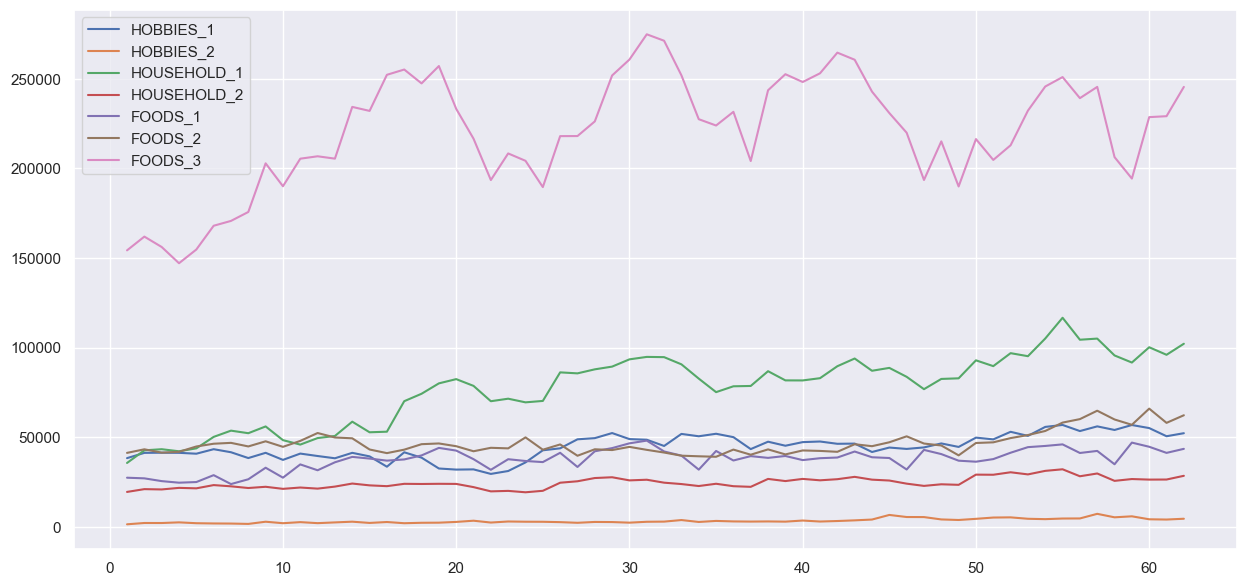

In [45]:
monthly_df.plot()

<Axes: >

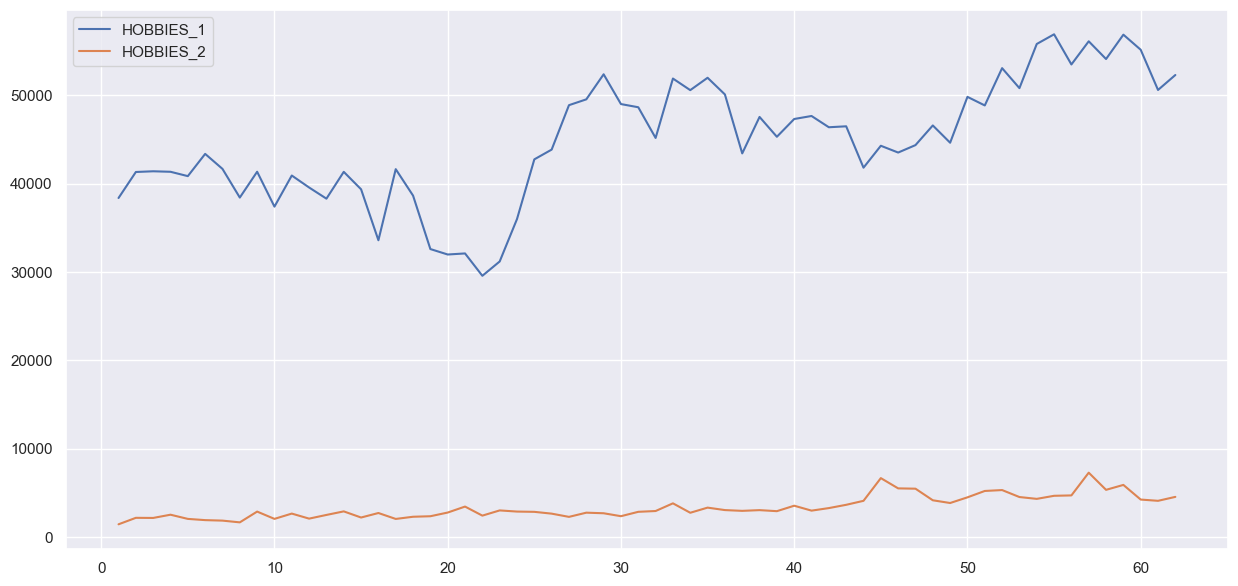

In [46]:
monthly_df.iloc[:, 0:2].plot()

<Axes: >

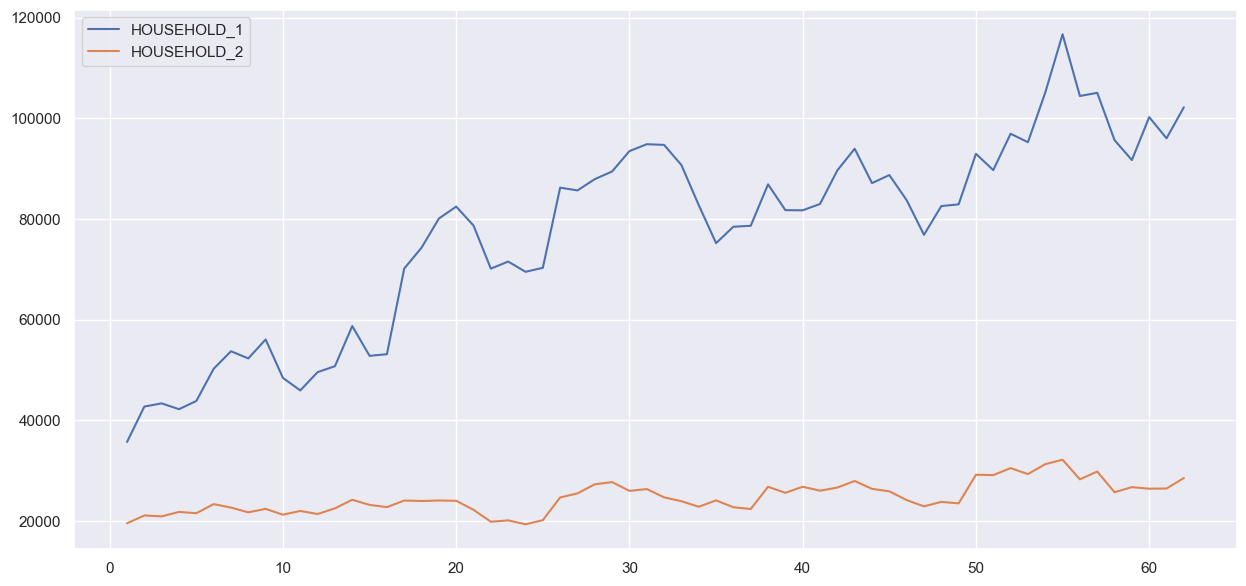

In [47]:
monthly_df.iloc[:, 2:4].plot()

<Axes: >

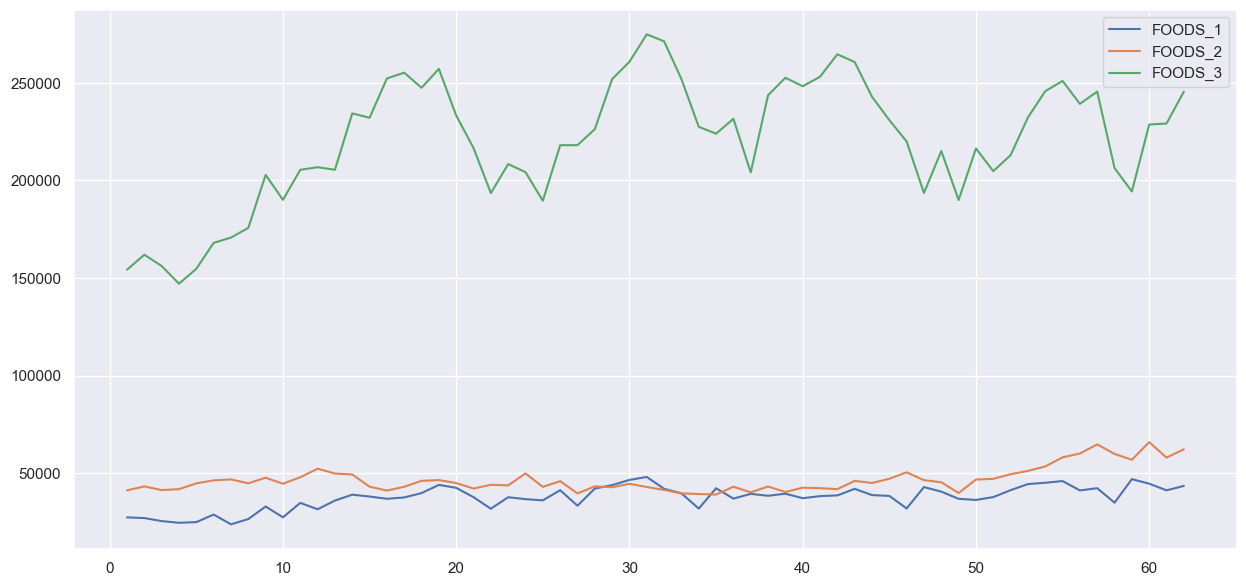

In [48]:
monthly_df.iloc[:, 4:].plot()

In [49]:
tx_group_by_state_dept_df = group_by_state_dept_df[group_by_state_dept_df.index == 'TX'].set_index('dept_id')
tx_group_by_state_dept_df

d_1   d_2   d_3   d_4   d_5   d_6   d_7   d_8   d_9  d_10  ...  \
dept_id                                                                  ...   
FOODS_1       500   446   381   317   297   445   337   466   432   368  ...   
FOODS_2      1384  1426  1008  1316  1143  1826   917  1319  1280  1111  ...   
FOODS_3      4969  5158  3735  3837  3162  4796  3417  5270  5208  4026  ...   
HOBBIES_1     837   775   435   756   448   798   355   732   725   496  ...   
HOBBIES_2      42    95    91    53    53    33    35    53    69    28  ...   
HOUSEHOLD_1  1281  1261   845   820   598   801   843  1142  1200   937  ...   
HOUSEHOLD_2   425   469   283   282   211   307   322   458   462   353  ...   

             d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  \
dept_id                                                                       
FOODS_1         730     796     736     589     613     644     707     695   
FOODS_2        1189    1257    1451    1292    1268    1168    1128    1115   
FOODS_3        5075    5891    6530    4953    5185    4430    4332    5029   
HOBBIES_1       942     972    1273     725     867     868     756     921   
HOBBIES_2       165     152     188     105     158     112     126     135   
HOUSEHOLD_1    2135    2696    2822    1809    2278    1881    2030    2245   
HOUSEHOLD_2     564     696     709     395     553     497     523     475   

             d_1912  d_1913  
dept_id                      
FOODS_1         748     650  
FOODS_2        1085    1341  
FOODS_3        6016    5774  
HOBBIES_1      1073    1139  
HOBBIES_2       149     127  
HOUSEHOLD_1    2523    2588  
HOUSEHOLD_2     672     663  

[7 rows x 1913 columns]

In [50]:
monthly_df = group_by_month(
    tx_group_by_state_dept_df,
    dept_agg_dict
)
monthly_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1682650318.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  monthly_df = merged_calendar_df.groupby(['year', 'month']).agg(_agg_dict).reset_index()


HOBBIES_1  HOBBIES_2  HOUSEHOLD_1  HOUSEHOLD_2  FOODS_1  FOODS_2  FOODS_3
1       16294       1539        29065         9968    11850    32599   110700
2       16663       1836        31765        10137    10957    35358   118446
3       17930       2017        31796         9791    10418    32703   116026
4       19086       2311        30877        10149     9114    33229   116854
5       19021       1663        31233         9464     9973    34910   129389
..        ...        ...          ...          ...      ...      ...      ...
58      27798       4741        68865        13616    19884    37264   131546
59      27445       4718        70966        14310    22950    37385   128207
60      27020       3624        71170        15231    24954    41277   138514
61      26711       3987        71567        16690    22178    38117   148860
62      27011       3753        73292        17668    23018    39113   159819

[62 rows x 7 columns]

<Axes: >

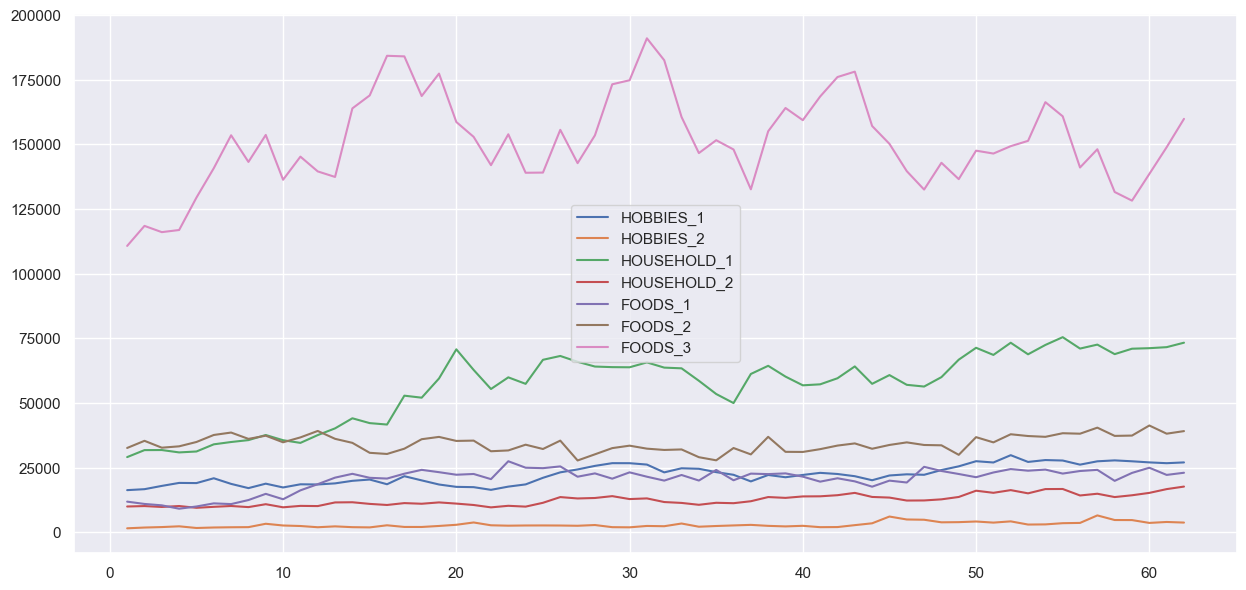

In [51]:
monthly_df.plot()

In [52]:
wi_group_by_state_dept_df = group_by_state_dept_df[group_by_state_dept_df.index == 'WI'].set_index('dept_id')
wi_group_by_state_dept_df

d_1   d_2   d_3   d_4   d_5   d_6   d_7   d_8   d_9  d_10  ...  \
dept_id                                                                  ...   
FOODS_1       686   628   489   448   183   656   653   733   444   414  ...   
FOODS_2       846   796   851   838   487  1122   878  1103  1065   786  ...   
FOODS_3      4692  4442  3766  4258  2153  4992  5283  6990  5456  3559  ...   
HOBBIES_1    1034   895   640   423   127   908  1219  1179   597   547  ...   
HOBBIES_2      49    31    44    32     5    22    21    36    26    36  ...   
HOUSEHOLD_1  1297  1082   866   764   269   849  1094  1358   798   831  ...   
HOUSEHOLD_2   394   440   241   221    85   334   385   483   278   258  ...   

             d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  d_1910  d_1911  \
dept_id                                                                       
FOODS_1         930    1165     893     746     812     797     835    1000   
FOODS_2        2816    2444    2600    1927    1921    1813    1764    2038   
FOODS_3        7210    7360    7432    5427    5061    4917    5072    5836   
HOBBIES_1       929    1207     906     706     836     765     801     919   
HOBBIES_2        92     127     123      81      77      81      80      95   
HOUSEHOLD_1    2256    2493    2408    1809    1759    1803    1953    2401   
HOUSEHOLD_2     501     542     537     443     398     419     438     518   

             d_1912  d_1913  
dept_id                      
FOODS_1        1162    1006  
FOODS_2        2155    2296  
FOODS_3        6916    6781  
HOBBIES_1      1121     952  
HOBBIES_2        77     108  
HOUSEHOLD_1    2802    2581  
HOUSEHOLD_2     629     602  

[7 rows x 1913 columns]

In [53]:
monthly_df = group_by_month(
    wi_group_by_state_dept_df,
    dept_agg_dict
)
monthly_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1682650318.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  monthly_df = merged_calendar_df.groupby(['year', 'month']).agg(_agg_dict).reset_index()


HOBBIES_1  HOBBIES_2  HOUSEHOLD_1  HOUSEHOLD_2  FOODS_1  FOODS_2  FOODS_3
1       18651       1053        26028         8499    14851    24012   103165
2       20162       1528        30773         8483    15474    23134    99173
3       21130       1553        27876         8224    14709    21411    91125
4       20672       1466        26830         8557    13570    20357    84924
5       19586       1338        28953         7993    13413    21568    91928
..        ...        ...          ...          ...      ...      ...      ...
58      24469       3187        59974        11196    23508    58419   147462
59      26061       3543        61040        11929    29083    60648   148394
60      25225       2285        64770        12479    28582    68728   166035
61      24937       2598        70753        13770    26206    66603   174246
62      25834       2798        68348        14028    29316    70826   181992

[62 rows x 7 columns]

<Axes: >

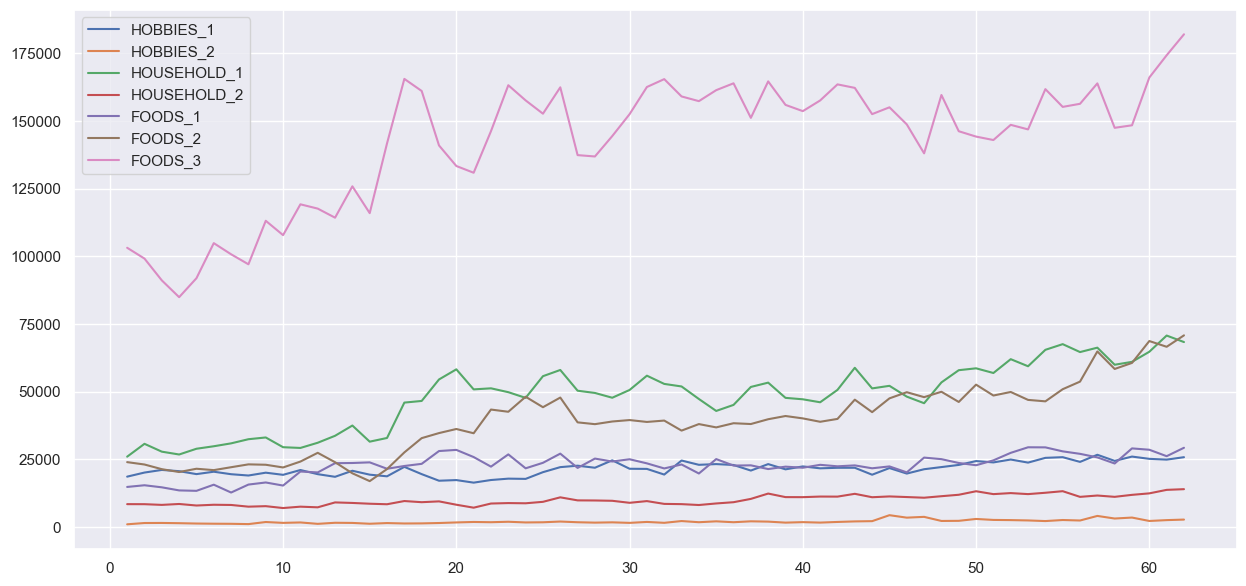

In [54]:
monthly_df.plot()

### 3.7. Seasonalities

In [55]:
calendar_df

date  wm_yr_wk    weekday  wday  month  year       d  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1   
1     2011-01-30     11101     Sunday     2      1  2011     d_2   
2     2011-01-31     11101     Monday     3      1  2011     d_3   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5   
...          ...       ...        ...   ...    ...   ...     ...   
1964  2016-06-15     11620  Wednesday     5      6  2016  d_1965   
1965  2016-06-16     11620   Thursday     6      6  2016  d_1966   
1966  2016-06-17     11620     Friday     7      6  2016  d_1967   
1967  2016-06-18     11621   Saturday     1      6  2016  d_1968   
1968  2016-06-19     11621     Sunday     2      6  2016  d_1969   

      event_name_1 event_type_1  event_name_2 event_type_2  snap_CA  snap_TX  \
0              NaN          NaN           NaN          NaN        0        0   
1              NaN          NaN           NaN          NaN        0        0   
2              NaN          NaN           NaN          NaN        0        0   
3              NaN          NaN           NaN          NaN        1        1   
4              NaN          NaN           NaN          NaN        1        0   
...            ...          ...           ...          ...      ...      ...   
1964           NaN          NaN           NaN          NaN        0        1   
1965           NaN          NaN           NaN          NaN        0        0   
1966           NaN          NaN           NaN          NaN        0        0   
1967           NaN          NaN           NaN          NaN        0        0   
1968  NBAFinalsEnd     Sporting  Father's day     Cultural        0        0   

      snap_WI  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
1964        1  
1965        0  
1966        0  
1967        0  
1968        0  

[1969 rows x 14 columns]

In [56]:
week_month_df = calendar_df.loc[:, ['d', 'weekday', 'month', 'wday']]
week_month_df

d    weekday  month  wday
0        d_1   Saturday      1     1
1        d_2     Sunday      1     2
2        d_3     Monday      1     3
3        d_4    Tuesday      2     4
4        d_5  Wednesday      2     5
...      ...        ...    ...   ...
1964  d_1965  Wednesday      6     5
1965  d_1966   Thursday      6     6
1966  d_1967     Friday      6     7
1967  d_1968   Saturday      6     1
1968  d_1969     Sunday      6     2

[1969 rows x 4 columns]

In [57]:
def calculate_heatmap_by_state(df, state):
    state_sales_val_df = df[df.state_id == state]
    state_sales_with_calendar_df = state_sales_val_df.iloc[:, 6:-2].T.reset_index().rename(
        columns={'index': 'd'}).merge(week_month_df, how='inner', on='d')
    sample_agg_dict = {i: sum for i in state_sales_val_df.index}
    state_sales_group_week_month_df = state_sales_with_calendar_df.groupby(
        ['weekday', 'wday', 'month'])
    state_sales_group_week_month_df = state_sales_group_week_month_df.agg(
        sample_agg_dict)
    state_sales_group_week_month_df = state_sales_group_week_month_df.sum(axis=1)

    state_heatmap_np = np.zeros((7, 12))
    weekday_list = [None] * 7
    for index, value in state_sales_group_week_month_df.items():
        state_heatmap_np[index[1] - 1, index[2] - 1] = value
        weekday_list[index[1] - 1] = index[0]
        
    return state_heatmap_np, weekday_list

In [58]:
ca_heatmap_np, weekday_list = calculate_heatmap_by_state(sales_val_df, 'CA')

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1576621086.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  state_sales_group_week_month_df = state_sales_group_week_month_df.agg(
/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1576621086.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  state_sales_group_week_month_df = state_sales_group_week_month_df.agg(


In [59]:
tx_heatmap_np, weekday_list = calculate_heatmap_by_state(sales_val_df, 'TX')

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1576621086.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  state_sales_group_week_month_df = state_sales_group_week_month_df.agg(
/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1576621086.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  state_sales_group_week_month_df = state_sales_group_week_month_df.agg(


In [60]:
wi_heatmap_np, weekday_list = calculate_heatmap_by_state(sales_val_df, 'WI')

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1576621086.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  state_sales_group_week_month_df = state_sales_group_week_month_df.agg(
/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/1576621086.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  state_sales_group_week_month_df = state_sales_group_week_month_df.agg(


In [61]:
heatmap_np = ca_heatmap_np + tx_heatmap_np + wi_heatmap_np

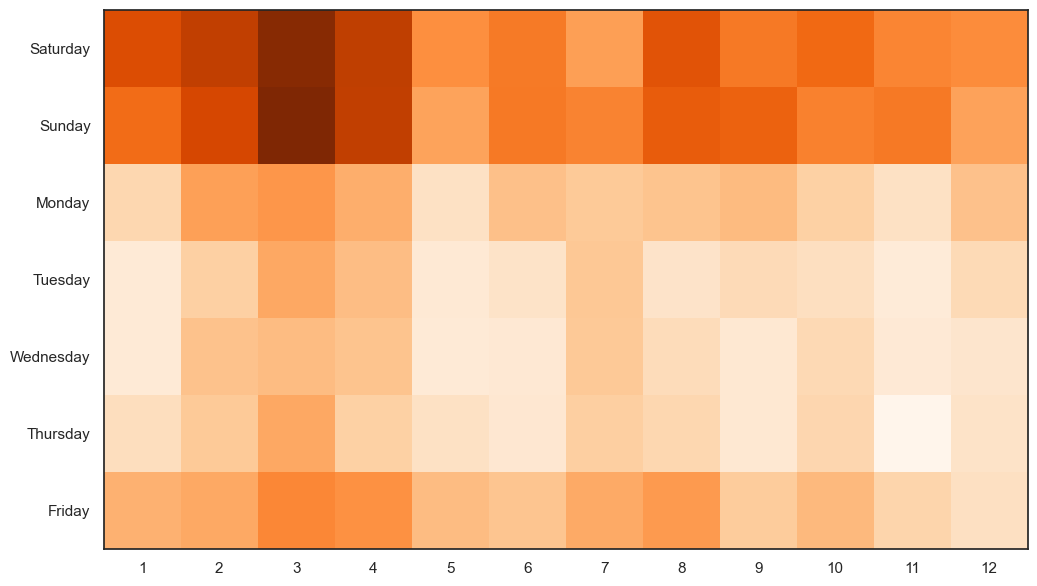

In [62]:
sns.set_style('white')
plt.imshow(heatmap_np, cmap='Oranges')
plt.xticks(np.arange(len(list(range(1, 13)))), labels=list(range(1, 13)))
plt.yticks(np.arange(len(weekday_list)), labels=weekday_list)
plt.show()

In [63]:
ca_heatmap_sum_week_np = ca_heatmap_np.sum(axis=1)
tx_heatmap_sum_week_np = tx_heatmap_np.sum(axis=1)
wi_heatmap_sum_week_np = wi_heatmap_np.sum(axis=1)

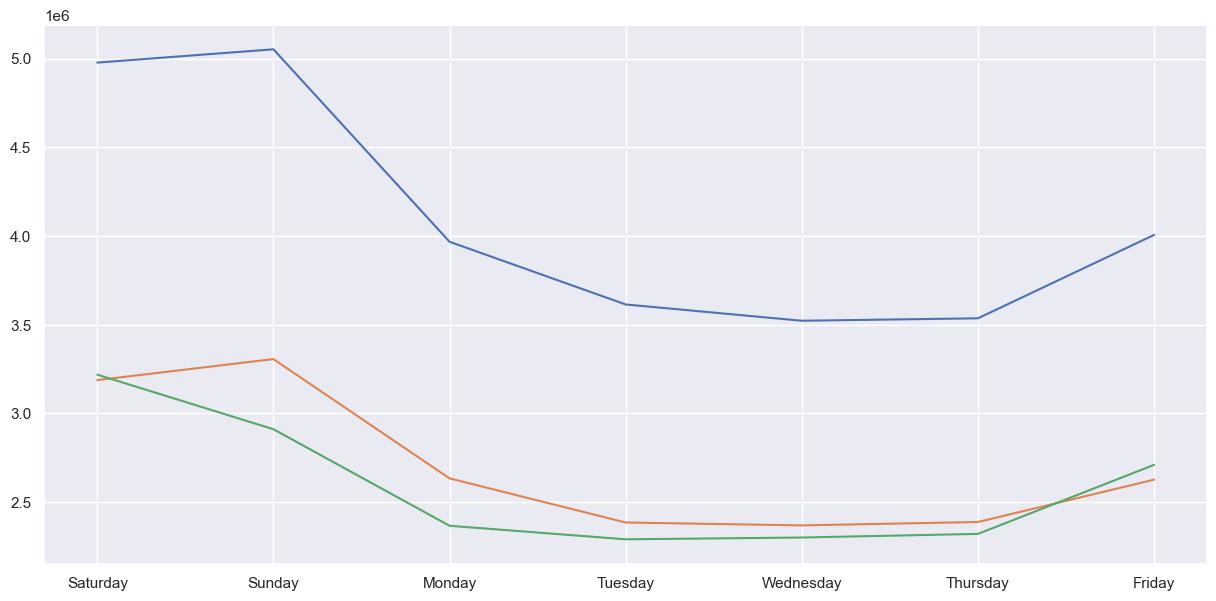

In [64]:
sns.set()

plt.plot(ca_heatmap_sum_week_np)
plt.plot(tx_heatmap_sum_week_np)
plt.plot(wi_heatmap_sum_week_np)
plt.xticks(np.arange(len(weekday_list)), labels=weekday_list)
plt.show()

In [65]:
ca_heatmap_sum_month_np = ca_heatmap_np.sum(axis=0)
tx_heatmap_sum_month_np = tx_heatmap_np.sum(axis=0)
wi_heatmap_sum_month_np = wi_heatmap_np.sum(axis=0)

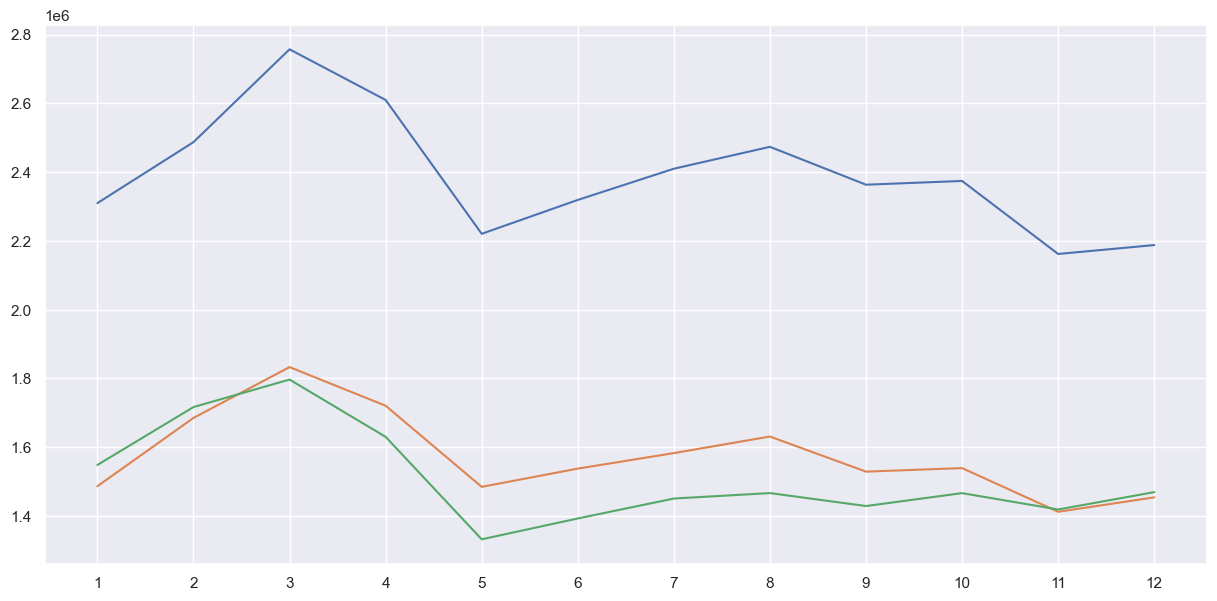

In [66]:
plt.plot(ca_heatmap_sum_month_np)
plt.plot(tx_heatmap_sum_month_np)
plt.plot(wi_heatmap_sum_month_np)
plt.xticks(np.arange(len(list(range(1, 13)))), labels=list(range(1, 13)))
plt.show()

## 4. The calendar

### 4.1. About the event

<Axes: >

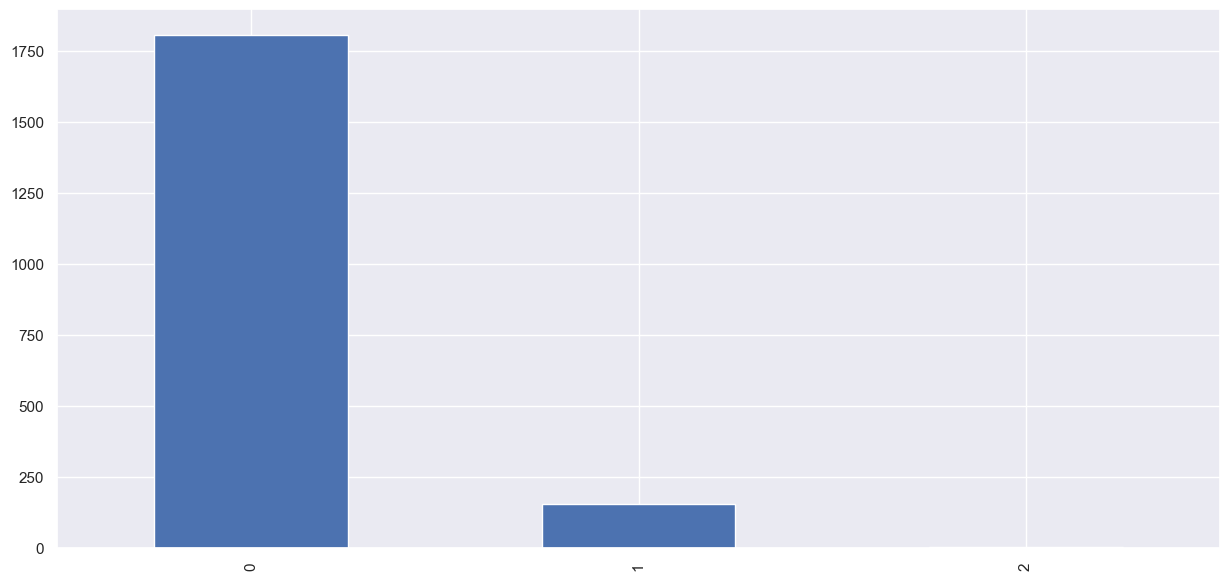

In [67]:
calendar_df.iloc[:, 7:11:2].notna().sum(axis=1).value_counts().plot(kind='bar')

In [68]:
calendar_df.iloc[:, 7:11:2].notna().sum(axis=1).value_counts()

0    1807
1     157
2       5
Name: count, dtype: int64

In [69]:
event_1_df = calendar_df.iloc[:, 8:12:2].event_type_1.value_counts()
event_1_df

event_type_1
Religious    55
National     52
Cultural     37
Sporting     18
Name: count, dtype: int64

In [70]:
event_2_df = calendar_df.iloc[:, 8:12:2].event_type_2.value_counts()
event_2_df

event_type_2
Cultural     4
Religious    1
Name: count, dtype: int64

In [71]:
event_df = pd.concat([event_1_df, event_2_df]).reset_index()
event_df = event_df.groupby('index').agg(sum).rename(columns={0: 'number_of_events'})
event_df

/var/folders/8_/m50_8s_942q571m12vh47_q80000gq/T/ipykernel_68475/3548095531.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  event_df = event_df.groupby('index').agg(sum).rename(columns={0: 'number_of_events'})


count
index           
Cultural      41
National      52
Religious     56
Sporting      18

<Axes: xlabel='index'>

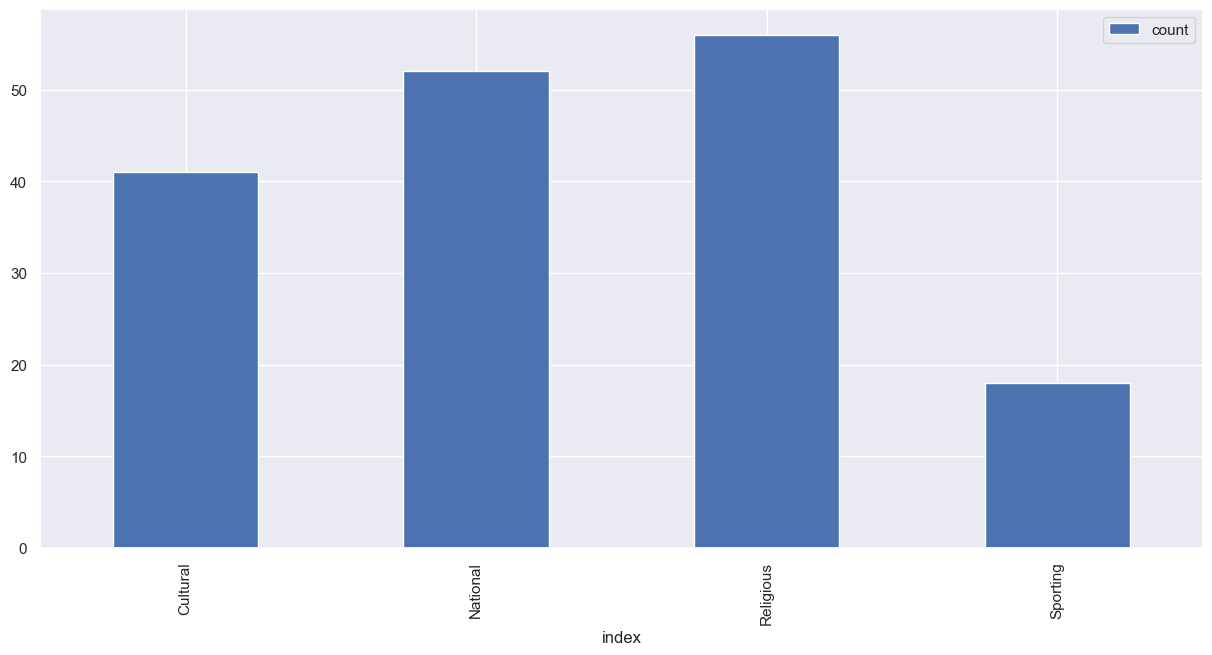

In [72]:
event_df.plot(kind='bar')

### 4.2. About the SNAP

In [73]:
calendar_df.iloc[:, -3:]

snap_CA  snap_TX  snap_WI
0           0        0        0
1           0        0        0
2           0        0        0
3           1        1        0
4           1        0        1
...       ...      ...      ...
1964        0        1        1
1965        0        0        0
1966        0        0        0
1967        0        0        0
1968        0        0        0

[1969 rows x 3 columns]

<Axes: xlabel='snap_CA'>

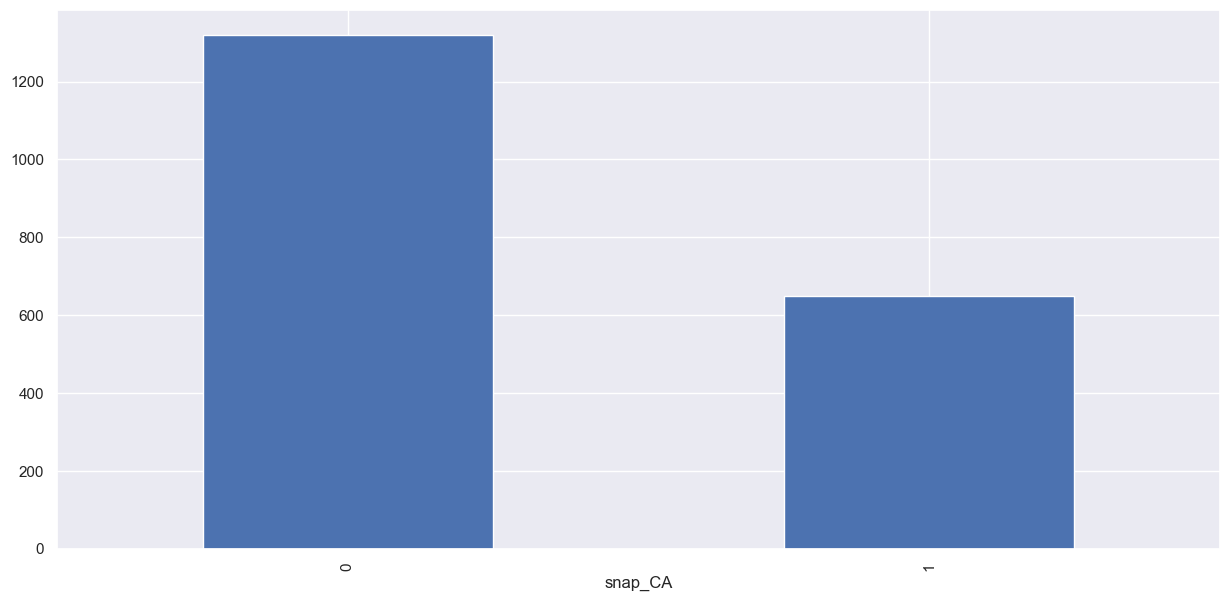

In [74]:
calendar_df.iloc[:, -3].value_counts().plot(kind='bar')

<Axes: xlabel='snap_TX'>

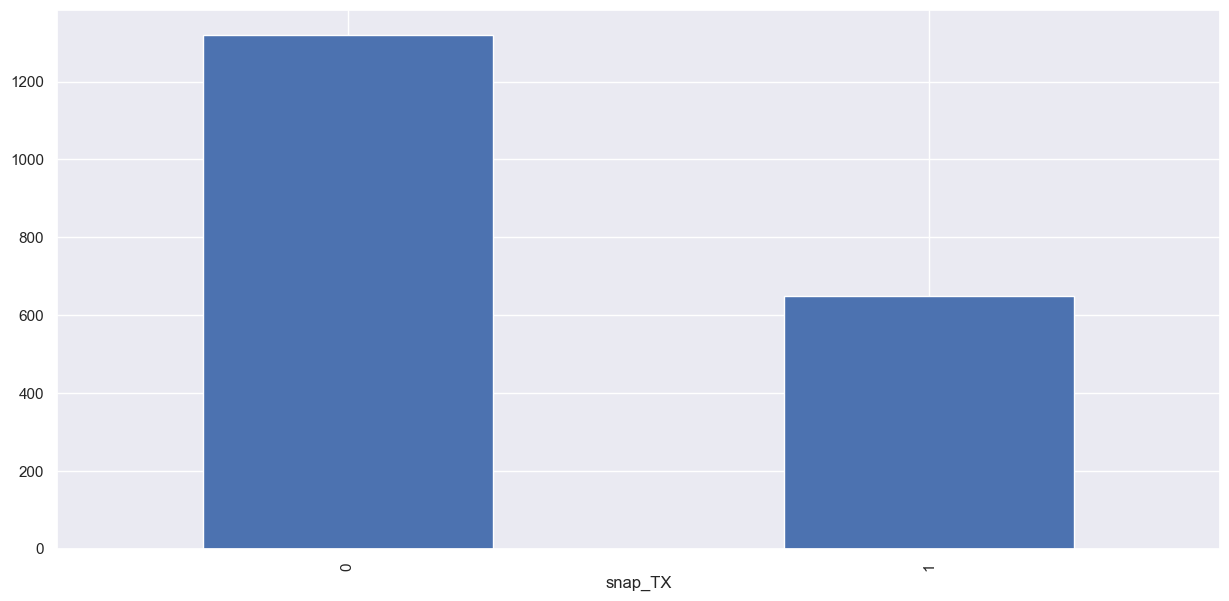

In [75]:
calendar_df.iloc[:, -2].value_counts().plot(kind='bar')

<Axes: xlabel='snap_WI'>

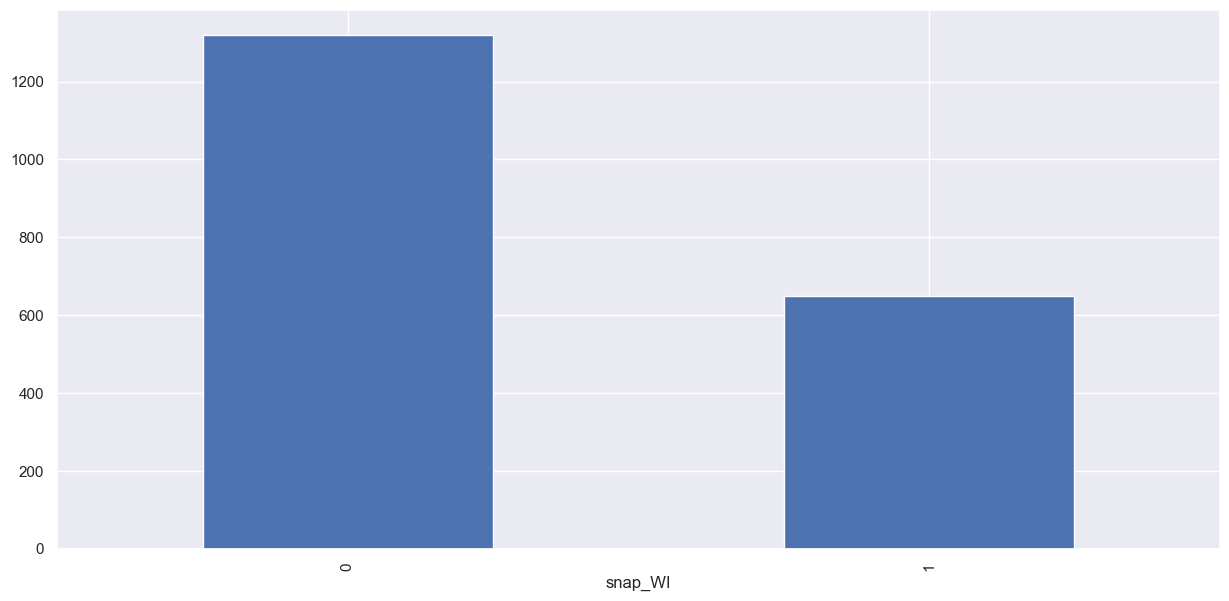

In [76]:
calendar_df.iloc[:, -1].value_counts().plot(kind='bar')

## 5. The price

### 5.1. Price between state, category and department

In [77]:
price_with_sales_df = sell_prices_df.merge(
    sales_val_df.iloc[:, 1:6],
    on=['store_id', 'item_id'],
    how='left'
)
price_with_sales_df

store_id        item_id  wm_yr_wk  sell_price    dept_id   cat_id  \
0           CA_1  HOBBIES_1_001     11325        9.58  HOBBIES_1  HOBBIES   
1           CA_1  HOBBIES_1_001     11326        9.58  HOBBIES_1  HOBBIES   
2           CA_1  HOBBIES_1_001     11327        8.26  HOBBIES_1  HOBBIES   
3           CA_1  HOBBIES_1_001     11328        8.26  HOBBIES_1  HOBBIES   
4           CA_1  HOBBIES_1_001     11329        8.26  HOBBIES_1  HOBBIES   
...          ...            ...       ...         ...        ...      ...   
6841116     WI_3    FOODS_3_827     11617        1.00    FOODS_3    FOODS   
6841117     WI_3    FOODS_3_827     11618        1.00    FOODS_3    FOODS   
6841118     WI_3    FOODS_3_827     11619        1.00    FOODS_3    FOODS   
6841119     WI_3    FOODS_3_827     11620        1.00    FOODS_3    FOODS   
6841120     WI_3    FOODS_3_827     11621        1.00    FOODS_3    FOODS   

        state_id  
0             CA  
1             CA  
2             CA  
3             CA  
4             CA  
...          ...  
6841116       WI  
6841117       WI  
6841118       WI  
6841119       WI  
6841120       WI  

[6841121 rows x 7 columns]

In [78]:
df_dict = {}
state_list = sorted(price_with_sales_df.state_id.unique())
cat_list = price_with_sales_df.cat_id.unique()

for state in state_list:
    df_dict[state] = {}
    for cat in cat_list: 
        df = price_with_sales_df[
            (price_with_sales_df.state_id == state) &
            (price_with_sales_df.cat_id == cat)
        ]
        df_dict[state][cat] = df

CA
CA
CA
TX
TX
TX
WI
WI
WI


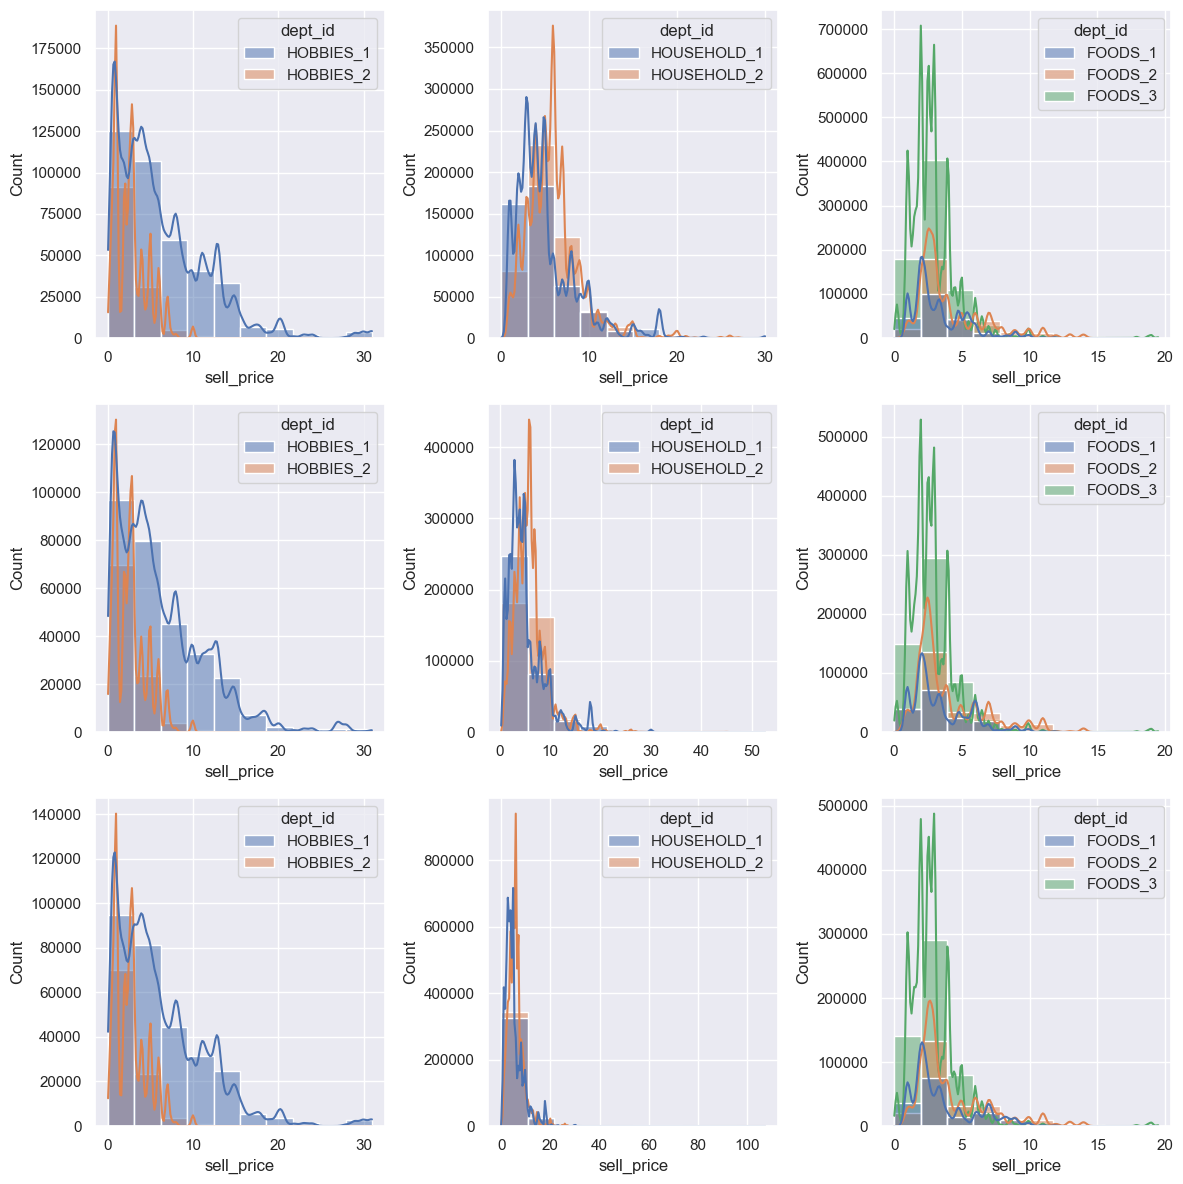

In [79]:
num_rows, num_cols = 3, 3
fig, ax = plt.subplots(num_rows, num_cols)
fig.set_size_inches(12, 12)

for row_index in range(num_rows):
    for col_index in range(num_cols):
        state = state_list[row_index]
        print(state)
        cat = cat_list[col_index]
        sns.histplot(
            data=df_dict[state][cat],
            x='sell_price',
            ax=ax[row_index, col_index],
            bins=10,
            hue='dept_id',
            kde=True
        )

# Add space between subplots
plt.tight_layout()
plt.show()

### 5.1. Price between year, category and department

In [80]:
price_with_sales_with_calendar_df = price_with_sales_df.merge(
    calendar_df.iloc[:, 1:6:4].drop_duplicates().reset_index(drop=True),
    on=['wm_yr_wk'],
    how='left'
)
price_with_sales_with_calendar_df

store_id        item_id  wm_yr_wk  sell_price    dept_id   cat_id  \
0           CA_1  HOBBIES_1_001     11325        9.58  HOBBIES_1  HOBBIES   
1           CA_1  HOBBIES_1_001     11326        9.58  HOBBIES_1  HOBBIES   
2           CA_1  HOBBIES_1_001     11327        8.26  HOBBIES_1  HOBBIES   
3           CA_1  HOBBIES_1_001     11328        8.26  HOBBIES_1  HOBBIES   
4           CA_1  HOBBIES_1_001     11329        8.26  HOBBIES_1  HOBBIES   
...          ...            ...       ...         ...        ...      ...   
6965769     WI_3    FOODS_3_827     11617        1.00    FOODS_3    FOODS   
6965770     WI_3    FOODS_3_827     11618        1.00    FOODS_3    FOODS   
6965771     WI_3    FOODS_3_827     11619        1.00    FOODS_3    FOODS   
6965772     WI_3    FOODS_3_827     11620        1.00    FOODS_3    FOODS   
6965773     WI_3    FOODS_3_827     11621        1.00    FOODS_3    FOODS   

        state_id  year  
0             CA  2013  
1             CA  2013  
2             CA  2013  
3             CA  2013  
4             CA  2013  
...          ...   ...  
6965769       WI  2016  
6965770       WI  2016  
6965771       WI  2016  
6965772       WI  2016  
6965773       WI  2016  

[6965774 rows x 8 columns]

In [81]:
df_dict = {}
year_list = sorted(price_with_sales_with_calendar_df.year.unique())
cat_list = price_with_sales_with_calendar_df.cat_id.unique()

for year in year_list:
    df_dict[year] = {}
    for cat in cat_list: 
        df = price_with_sales_with_calendar_df[
            (price_with_sales_with_calendar_df.year == year) &
            (price_with_sales_with_calendar_df.cat_id == cat)
        ]
        df_dict[year][cat] = df

In [82]:
year_list

[np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016)]

2011
2011
2011
2012
2012
2012
2013
2013
2013
2014
2014
2014
2015
2015
2015
2016
2016
2016


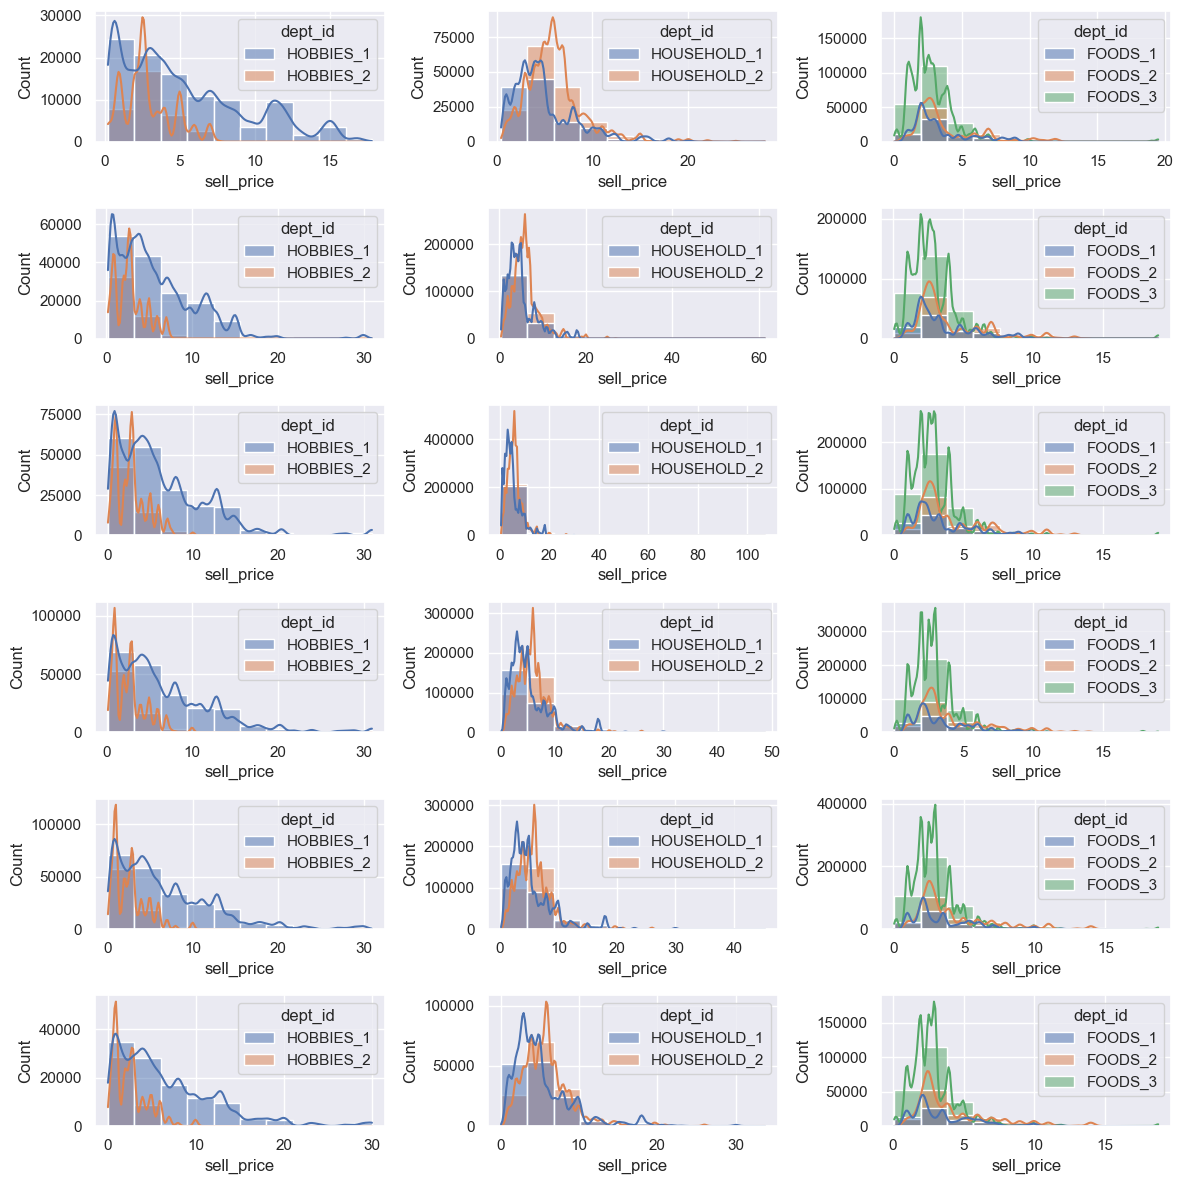

In [83]:
num_rows, num_cols = 6, 3
fig, ax = plt.subplots(num_rows, num_cols)
fig.set_size_inches(12, 12)

for row_index in range(num_rows):
    for col_index in range(num_cols):
        year = year_list[row_index]
        print(year)
        cat = cat_list[col_index]
        sns.histplot(
            data=df_dict[year][cat],
            x='sell_price',
            ax=ax[row_index, col_index],
            bins=10,
            hue='dept_id',
            kde=True
        )

# Add space between subplots
plt.tight_layout()
plt.show()

## 6. Connection to the time series 

### 6.1. Time series with category and event

In [84]:
event_df = pd.concat([
    calendar_df.iloc[:, 6],
    calendar_df.iloc[:, 7:11:2].notna().sum(axis=1)
    ], axis=1
).rename(columns={0:'num_event'})
event_df

d  num_event
0        d_1          0
1        d_2          0
2        d_3          0
3        d_4          0
4        d_5          0
...      ...        ...
1964  d_1965          0
1965  d_1966          0
1966  d_1967          0
1967  d_1968          0
1968  d_1969          2

[1969 rows x 2 columns]

In [85]:
_merge_df = group_by_category_df.T.reset_index().rename(columns={'index': 'd'}).merge(
    event_df,
    on='d',
    how='left'
).reset_index()
_merge_df.num_event = _merge_df.num_event.replace({0: 'not_event', 1: 'event', 2: 'event'})
_merge_df

index       d  FOODS  HOBBIES  HOUSEHOLD  num_event
0         0     d_1  23178     3764       5689  not_event
1         1     d_2  22758     3357       5634  not_event
2         2     d_3  17174     2682       3927  not_event
3         3     d_4  18878     2669       3865  not_event
4         4     d_5  14603     1814       2729  not_event
...     ...     ...    ...      ...        ...        ...
1908   1908  d_1909  23632     3472       8239  not_event
1909   1909  d_1910  23317     3353       8363  not_event
1910   1910  d_1911  26704     4085       9728  not_event
1911   1911  d_1912  31927     4787      12248  not_event
1912   1912  d_1913  32654     4683      12458  not_event

[1913 rows x 6 columns]

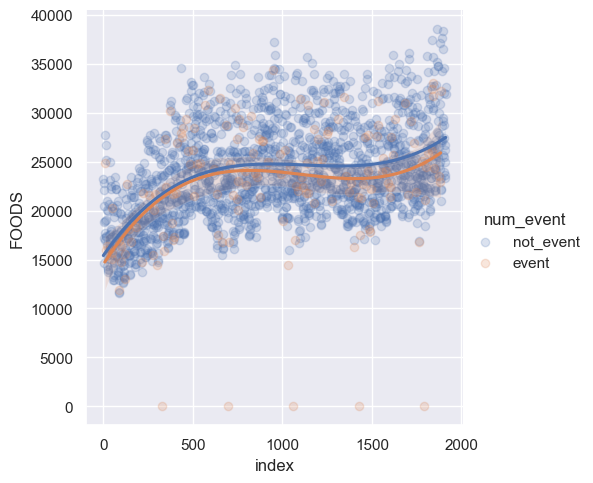

In [86]:
sns.lmplot(data=_merge_df, x='index', y='FOODS', hue='num_event', order=3, scatter_kws={'alpha': 0.2})

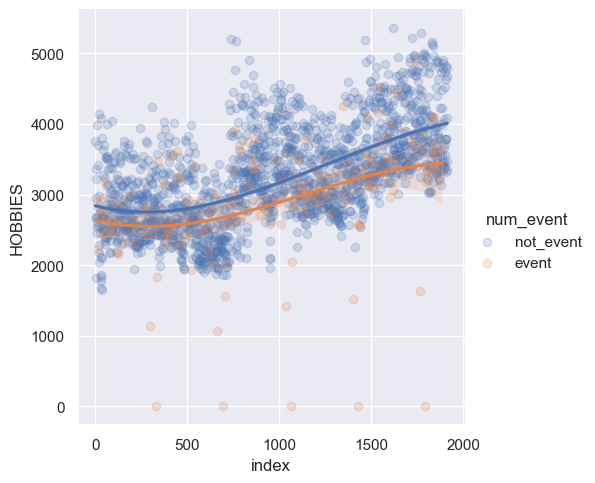

In [87]:
sns.lmplot(data=_merge_df, x='index', y='HOBBIES', hue='num_event', order=3, scatter_kws={'alpha': 0.2})

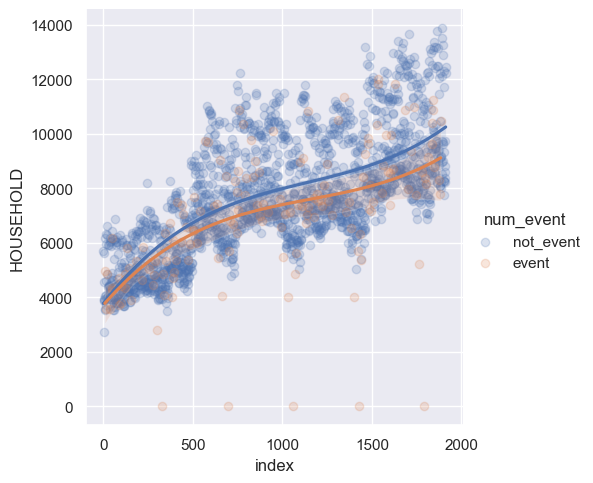

In [88]:
sns.lmplot(data=_merge_df, x='index', y='HOUSEHOLD', hue='num_event', order=3, scatter_kws={'alpha': 0.2})

### 6.2. Time series with state and event

In [89]:
_merge_df = group_by_state_df.T.reset_index().rename(columns={'index': 'd'}).merge(
    event_df,
    on='d',
    how='left'
).reset_index()
_merge_df.num_event = _merge_df.num_event.replace({0: 'not_event', 1: 'event', 2: 'event'})
_merge_df

index       d     CA     TX     WI  num_event
0         0     d_1  14195   9438   8998  not_event
1         1     d_2  13805   9630   8314  not_event
2         2     d_3  10108   6778   6897  not_event
3         3     d_4  11047   7381   6984  not_event
4         4     d_5   9925   5912   3309  not_event
...     ...     ...    ...    ...    ...        ...
1908   1908  d_1909  15148   9600  10595  not_event
1909   1909  d_1910  14488   9602  10943  not_event
1910   1910  d_1911  17095  10615  12807  not_event
1911   1911  d_1912  21834  12266  14862  not_event
1912   1912  d_1913  23187  12282  14326  not_event

[1913 rows x 6 columns]

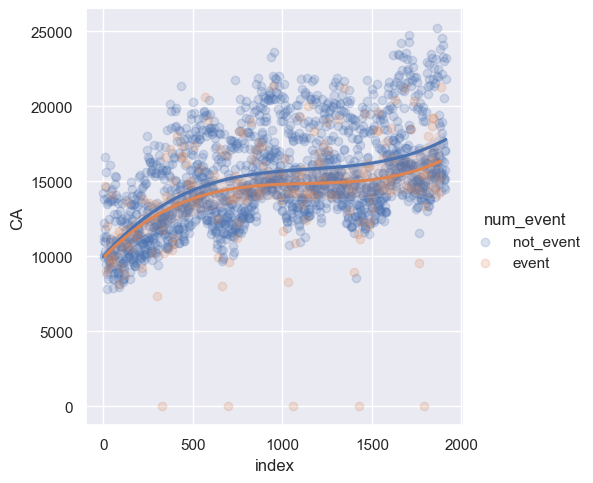

In [90]:
sns.lmplot(data=_merge_df, x='index', y='CA', hue='num_event', order=3, scatter_kws={'alpha': 0.2})

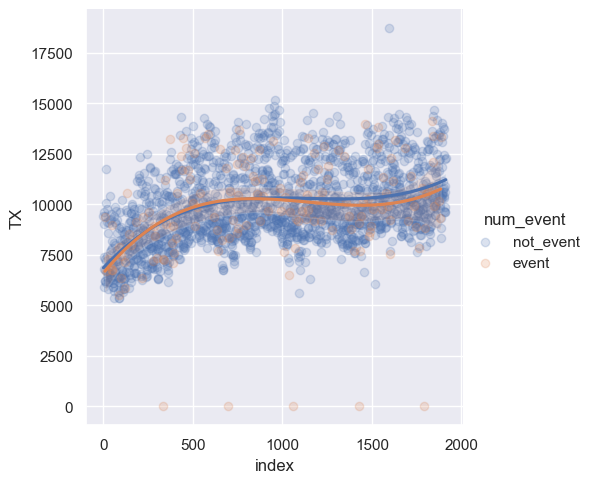

In [91]:
sns.lmplot(data=_merge_df, x='index', y='TX', hue='num_event', order=3, scatter_kws={'alpha': 0.2})

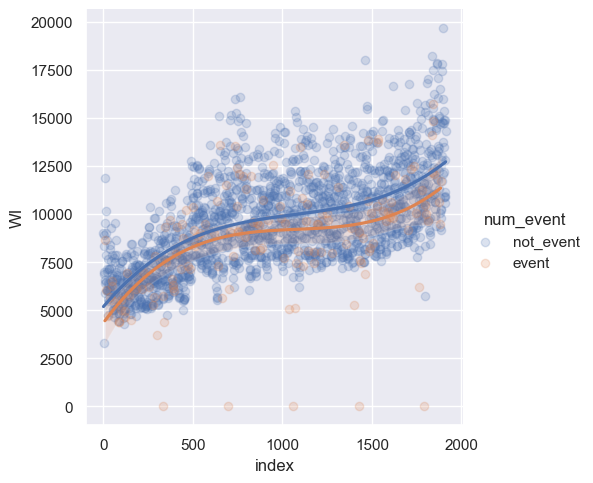

In [92]:
sns.lmplot(data=_merge_df, x='index', y='WI', hue='num_event', order=3, scatter_kws={'alpha': 0.2})

### 6.3. Time series with state and SNAP

In [93]:
snap_df = pd.concat([
    calendar_df.iloc[:, 6],
    calendar_df.iloc[:, -3:]
    ], axis=1
).rename(columns={0:'num_event'})
snap_df

d  snap_CA  snap_TX  snap_WI
0        d_1        0        0        0
1        d_2        0        0        0
2        d_3        0        0        0
3        d_4        1        1        0
4        d_5        1        0        1
...      ...      ...      ...      ...
1964  d_1965        0        1        1
1965  d_1966        0        0        0
1966  d_1967        0        0        0
1967  d_1968        0        0        0
1968  d_1969        0        0        0

[1969 rows x 4 columns]

In [94]:
_merge_df = group_by_state_df.T.reset_index().rename(columns={'index': 'd'}).merge(
    snap_df,
    on='d',
    how='left'
).reset_index()
_merge_df

index       d     CA     TX     WI  snap_CA  snap_TX  snap_WI
0         0     d_1  14195   9438   8998        0        0        0
1         1     d_2  13805   9630   8314        0        0        0
2         2     d_3  10108   6778   6897        0        0        0
3         3     d_4  11047   7381   6984        1        1        0
4         4     d_5   9925   5912   3309        1        0        1
...     ...     ...    ...    ...    ...      ...      ...      ...
1908   1908  d_1909  15148   9600  10595        0        0        0
1909   1909  d_1910  14488   9602  10943        0        0        0
1910   1910  d_1911  17095  10615  12807        0        0        0
1911   1911  d_1912  21834  12266  14862        0        0        0
1912   1912  d_1913  23187  12282  14326        0        0        0

[1913 rows x 8 columns]

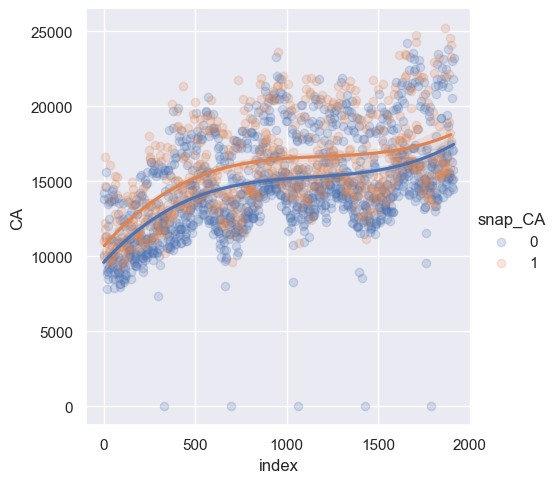

In [95]:
sns.lmplot(data=_merge_df, x='index', y='CA', hue='snap_CA', order=3, scatter_kws={'alpha': 0.2})

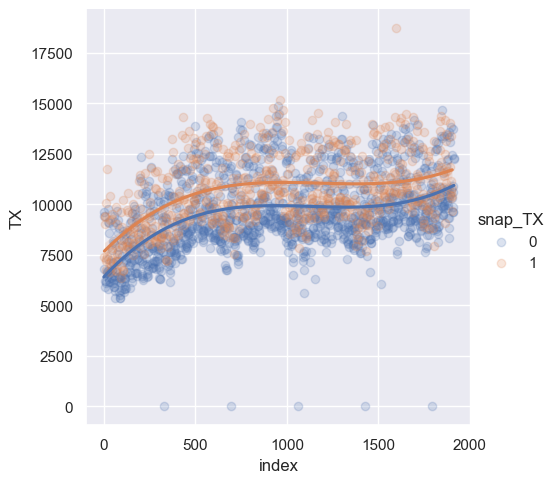

In [96]:
sns.lmplot(data=_merge_df, x='index', y='TX', hue='snap_TX', order=3, scatter_kws={'alpha': 0.2})

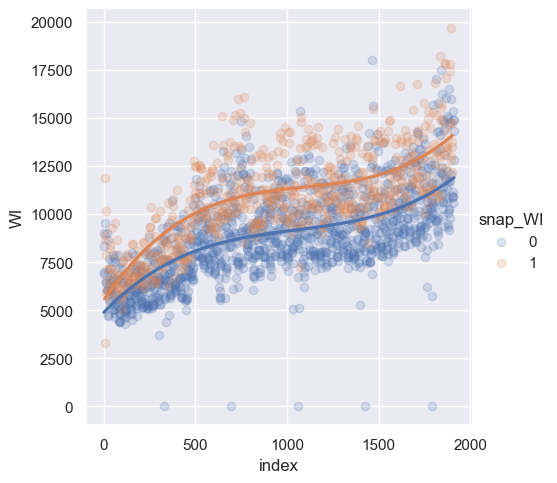

In [97]:
sns.lmplot(data=_merge_df, x='index', y='WI', hue='snap_WI', order=3, scatter_kws={'alpha': 0.2})